<a href="https://colab.research.google.com/github/Filipe-Miguel/CAS/blob/main/CAS_M2_FinalProject_FilipeLaura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Worldwide deaths by country/risk factors**; 

This dataset shows the total annual deaths due to each risk factor, by country. The data is downloaded from WHO website.

**Project's goal** = identify statistically significant risk factors for deaths in 3 different countries (India, Ethiopia and Switzerland). 


In [ ]:
#Load packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats



In [ ]:
#Import the dataset 
from google.colab import files
uploaded = files.upload()
# import the python module pandas with the abbreviation pd
import pandas as pd
# Read the data in the iris.csv file into a dataframe
# If you work on colab, you need the data file on colab of course
df = pd.read_csv('number-of-deaths-by-risk-factor.csv') 
df.head() # print data


Saving number-of-deaths-by-risk-factor.csv to number-of-deaths-by-risk-factor.csv


Entity  Year  Unsafe water source  Unsafe sanitation  \
0  Afghanistan  1990          7554.049543        5887.747628   
1  Afghanistan  1991          7359.676749        5732.770160   
2  Afghanistan  1992          7650.437822        5954.804987   
3  Afghanistan  1993         10270.731380        7986.736613   
4  Afghanistan  1994         11409.177110        8863.010065   

   No access to handwashing facility  \
0                        5412.314513   
1                        5287.891103   
2                        5506.657363   
3                        7104.620351   
4                        8051.515953   

   Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                               22388.49723                  3221.138842   
1                               22128.75821                  3150.559597   
2                               22873.76879                  3331.349048   
3                               25599.75628                  4477.006100   
4                               28013.16720                  5102.622054   

   Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                  156.097553    22778.84925     10408.43885  ...   
1                  151.539851    22292.69111     10271.97643  ...   
2                  156.609194    23102.19794     10618.87978  ...   
3                  206.834451    27902.66996     12260.09384  ...   
4                  233.930571    32929.00593     14197.94796  ...   

   High systolic blood pressure      Smoking  Iron deficiency  \
0                   28183.98335  6393.667372       726.431294   
1                   28435.39751  6429.253320       739.245799   
2                   29173.61120  6561.054957       873.485341   
3                   30074.76091  6731.972560      1040.047422   
4                   30809.49117  6889.328118      1101.764645   

   Vitamin A deficiency  Low bone mineral density  Air pollution  \
0           9344.131952                374.844056    26598.00673   
1           9330.182378                379.854237    26379.53222   
2           9769.844533                388.130434    27263.12791   
3          11433.769490                405.577931    30495.56150   
4          12936.955860                415.349195    33323.16140   

   Outdoor air pollution  Diet high in sodium  Diet low in whole grains  \
0                4383.83          2737.197934               11381.37735   
1                4426.36          2741.184956               11487.83239   
2                4568.91          2798.560245               11866.23557   
3                5080.29          2853.301679               12335.96168   
4                5499.23          2880.025765               12672.95019   

   Diet low in nuts and seeds  
0                 7299.867330  
1                 7386.764303  
2                 7640.628526  
3                 7968.311853  
4                 8244.368430  

[5 rows x 31 columns]

In [ ]:
#Add life expectancy data 
from google.colab import files
uploaded = files.upload()
import pandas as pd
life_exp = pd.read_csv('life_expectancy_years.csv') 
life_exp.head() # print data

Saving life_expectancy_years.csv to life_expectancy_years.csv


country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1   
1                Angola  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2               Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4   
3               Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4  United Arab Emirates  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7  30.7   

   ...  2091  2092  2093  2094  2095  2096  2097  2098  2099  2100  
0  ...  75.5  75.7  75.8  76.0  76.1  76.2  76.4  76.5  76.6  76.8  
1  ...  78.8  79.0  79.1  79.2  79.3  79.5  79.6  79.7  79.9  80.0  
2  ...  87.4  87.5  87.6  87.7  87.8  87.9  88.0  88.2  88.3  88.4  
3  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  ...  82.4  82.5  82.6  82.7  82.8  82.9  83.0  83.1  83.2  83.3  

[5 rows x 302 columns]

In [ ]:
#Add gini coefficient data 
from google.colab import files
uploaded = files.upload()
import pandas as pd
gini = pd.read_csv('gini.csv') 
gini.head() # print data

Saving gini.csv to gini.csv


country  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
0           Afghanistan  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5  30.5   
1                Angola  57.7  57.7  57.7  57.7  57.7  57.7  57.7  57.7  57.7   
2               Albania  39.9  39.9  39.9  39.9  39.9  39.9  39.9  39.9  39.9   
3               Andorra  42.5  42.5  42.5  42.5  42.5  42.5  42.5  42.5  42.5   
4  United Arab Emirates  39.8  39.8  39.8  39.8  39.8  39.8  39.8  39.7  39.7   

   ...  2041  2042  2043  2044  2045  2046  2047  2048  2049  2050  
0  ...  38.2  38.2  38.2  38.2  38.2  38.2  38.2  38.2  38.2  38.2  
1  ...  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  52.0  
2  ...  33.7  33.7  33.7  33.7  33.7  33.7  33.7  33.7  33.7  33.7  
3  ...  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  35.0  
4  ...  25.9  25.9  25.9  25.9  25.9  25.9  25.9  25.9  25.9  25.9  

[5 rows x 252 columns]

In [ ]:
#Add freedom index data 
from google.colab import files
uploaded = files.upload()
import pandas as pd
free = pd.read_csv('freedix_fh.csv') 
free.head() # print data

Saving freedix_fh.csv to freedix_fh.csv


country  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
0           Afghanistan   4.5   6.5   6.5   6.5   6.5   6.0   7.0   7.0   7.0   
1                Angola   NaN   NaN   NaN   6.0   6.0   7.0   7.0   7.0   7.0   
2               Albania   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   
3               Andorra   3.5   4.0   4.0   4.0   4.0   NaN   NaN   NaN   NaN   
4  United Arab Emirates   6.0   5.5   5.5   5.5   5.0   5.0   5.0   5.0   5.0   

   ...  2011  2012  2013  2014  2015  2016  2017  2018  2019  2020  
0  ...   6.0   6.0   6.0   6.0   6.0   6.0   5.5   5.5   5.5   5.5  
1  ...   5.5   5.5   5.5   5.5   6.0   6.0   6.0   5.5   5.5   5.5  
2  ...   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0  
3  ...   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0  
4  ...   6.0   6.0   6.0   6.0   6.0   6.0   6.5   6.5   6.5   6.5  

[5 rows x 50 columns]

In [ ]:
# import the python module pandas with the abbreviation pd
from google.colab import files
uploaded = files.upload()
import pandas as pd
incom = pd.read_csv('mincpcap_cppp.csv') 
incom.head() # print data

Saving mincpcap_cppp.csv to mincpcap_cppp.csv


country   1800   1801   1802   1803   1804   1805   1806  \
0           Afghanistan  0.919  0.919  0.919  0.919  0.919  0.919  0.919   
1                Angola  2.270  2.270  2.280  2.290  2.300  2.310  2.320   
2               Albania  1.220  1.220  1.220  1.220  1.220  1.220  1.220   
3               Andorra  1.480  1.490  1.490  1.490  1.490  1.500  1.500   
4  United Arab Emirates  2.900  2.910  2.920  2.930  2.940  2.950  2.960   

    1807   1808  ...    2041    2042    2043    2044    2045    2046    2047  \
0  0.919  0.919  ...    3.93    4.01    4.10    4.18    4.27    4.36    4.46   
1  2.330  2.350  ...    3.61    3.68    3.76    3.84    3.92    4.01    4.09   
2  1.220  1.220  ...   16.70   17.00   17.40   17.80   18.10   18.50   18.90   
3  1.500  1.510  ...  120.00  123.00  125.00  128.00  131.00  134.00  136.00   
4  2.970  2.980  ...  104.00  107.00  109.00  111.00  113.00  116.00  118.00   

     2048    2049    2050  
0    4.55    4.65    4.75  
1    4.18    4.27    4.36  
2   19.30   19.70   20.10  
3  139.00  142.00  145.00  
4  121.00  123.00  126.00  

[5 rows x 252 columns]

In [ ]:
# import the python module pandas with the abbreviation pd; this dataframe has the entire population of each country
from google.colab import files
uploaded = files.upload()
import pandas as pd
pop = pd.read_csv('pop_final.csv', delimiter=';') 
pop.head() # print data

Saving pop_final.csv to pop_final.csv


Country Name         2010         2011         2012  \
0                  Afghanistan   29185511.0   30117411.0   31161378.0   
1  Africa Eastern and Southern  518468229.0  532760424.0  547482863.0   
2   Africa Western and Central  350556886.0  360285439.0  370243017.0   
3                      Albania    2913021.0    2905195.0    2900401.0   
4                      Algeria   35977451.0   36661438.0   37383899.0   

          2013         2014         2015         2016         2017  \
0   32269592.0   33370804.0   34413603.0   35383028.0   36296111.0   
1  562601578.0  578075373.0  593871847.0  609978946.0  626392880.0   
2  380437896.0  390882979.0  401586651.0  412551299.0  423769930.0   
3    2895092.0    2889104.0    2880703.0    2876101.0    2873457.0   
4   38140135.0   38923688.0   39728020.0   40551398.0   41389174.0   

          2018         2019         2020         2021  
0   37171922.0   38041757.0   38928341.0   39835428.0  
1  643090131.0  660046272.0  677243299.0  694665117.0  
2  435229381.0  446911598.0  458803476.0  470898870.0  
3    2866376.0    2854191.0    2837849.0    2811666.0  
4   42228415.0   43053054.0   43851043.0   44616626.0

In [ ]:
#We must select the dates we are interested in
# We will keep the data from 2010-2017 
df = df[df['Year'].between(2010, 2017)]

incom.columns




Index(['country', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2041', '2042', '2043', '2044', '2045', '2046', '2047', '2048', '2049',
       '2050'],
      dtype='object', length=252)

In [ ]:

# remove special character
incom.columns = incom.columns.str.replace(' ', '')
  
# print file after removing special character
print("\n\n", incom)


incom = incom[['country',"2010", "2011","2012", "2013", "2014", "2015", "2016","2017"]]
free = free[['country',"2010", "2011","2012", "2013", "2014", "2015", "2016","2017"]]
gini = gini[['country',"2010", "2011","2012", "2013", "2014", "2015", "2016","2017"]]
life_exp = life_exp[['country',"2010", "2011","2012", "2013", "2014", "2015", "2016","2017"]]
pop = pop[['Country Name',"2010", "2011","2012", "2013", "2014", "2015", "2016","2017"]]

pop




                   country   1800   1801   1802   1803   1804   1805   1806  \
0             Afghanistan  0.919  0.919  0.919  0.919  0.919  0.919  0.919   
1                  Angola  2.270  2.270  2.280  2.290  2.300  2.310  2.320   
2                 Albania  1.220  1.220  1.220  1.220  1.220  1.220  1.220   
3                 Andorra  1.480  1.490  1.490  1.490  1.490  1.500  1.500   
4    United Arab Emirates  2.900  2.910  2.920  2.930  2.940  2.950  2.960   
..                    ...    ...    ...    ...    ...    ...    ...    ...   
190                 Samoa  2.760  2.760  2.760  2.760  2.760  2.760  2.760   
191                 Yemen  1.220  1.230  1.230  1.230  1.240  1.240  1.240   
192          South Africa  1.340  1.320  1.310  1.290  1.280  1.210  1.210   
193                Zambia  1.260  1.260  1.270  1.270  1.270  1.270  1.280   
194              Zimbabwe  1.940  1.940  1.940  1.940  1.950  1.950  1.950   

      1807   1808  ...    2041    2042    2043    2044    20

Country Name          2010          2011          2012  \
0                    Afghanistan  2.918551e+07  3.011741e+07  3.116138e+07   
1    Africa Eastern and Southern  5.184682e+08  5.327604e+08  5.474829e+08   
2     Africa Western and Central  3.505569e+08  3.602854e+08  3.702430e+08   
3                        Albania  2.913021e+06  2.905195e+06  2.900401e+06   
4                        Algeria  3.597745e+07  3.666144e+07  3.738390e+07   
..                           ...           ...           ...           ...   
261           West Bank and Gaza  3.786161e+06  3.882986e+06  3.979998e+06   
262                        World  6.921855e+09  7.003760e+09  7.089255e+09   
263                        Yemen  2.251646e+07  2.315485e+07  2.380759e+07   
264                       Zambia  1.360599e+07  1.402320e+07  1.446515e+07   
265                     Zimbabwe  1.269773e+07  1.289432e+07  1.311515e+07   

             2013          2014          2015          2016          2017  
0    3.226959e+07  3.337080e+07  3.441360e+07  3.538303e+07  3.629611e+07  
1    5.626016e+08  5.780754e+08  5.938718e+08  6.099789e+08  6.263929e+08  
2    3.804379e+08  3.908830e+08  4.015867e+08  4.125513e+08  4.237699e+08  
3    2.895092e+06  2.889104e+06  2.880703e+06  2.876101e+06  2.873457e+06  
4    3.814014e+07  3.892369e+07  3.972802e+07  4.055140e+07  4.138917e+07  
..            ...           ...           ...           ...           ...  
261  4.076708e+06  4.173398e+06  4.270092e+06  4.367088e+06  4.454805e+06  
262  7.175500e+09  7.261847e+09  7.347679e+09  7.433651e+09  7.519371e+09  
263  2.447318e+07  2.514711e+07  2.582349e+07  2.649788e+07  2.716821e+07  
264  1.492655e+07  1.539979e+07  1.587937e+07  1.636345e+07  1.685361e+07  
265  1.335038e+07  1.358671e+07  1.381464e+07  1.403034e+07  1.423660e+07  

[266 rows x 9 columns]

In [ ]:
life_exp

country  2010  2011  2012  2013  2014  2015  2016  2017
0             Afghanistan  60.5  61.0  61.4  61.9  61.9  61.9  62.0  62.9
1                  Angola  60.2  60.8  61.4  62.1  63.0  63.5  63.9  64.2
2                 Albania  78.1  78.1  78.2  78.3  78.2  78.1  78.2  78.3
3                 Andorra  81.8  81.9  81.9  82.0  82.0  82.0  82.1  82.1
4    United Arab Emirates  70.8  71.0  71.2  71.6  73.0  73.2  73.4  73.5
..                    ...   ...   ...   ...   ...   ...   ...   ...   ...
190                 Samoa  69.6  69.7  69.6  69.9  70.0  70.1  70.2  70.3
191                 Yemen  67.6  67.8  67.9  68.4  68.5  68.2  67.5  67.3
192          South Africa  57.1  58.7  60.1  61.3  61.8  62.3  62.7  63.2
193                Zambia  56.5  57.5  58.5  59.5  60.2  60.8  61.4  61.9
194              Zimbabwe  52.3  54.4  56.0  57.2  58.0  58.6  59.2  59.9

[195 rows x 9 columns]

In [ ]:
#Lets transpose the df 
incom2 = incom.melt(id_vars=["country"], 
        var_name="Date", 
        value_name="Value")

incom2


country  Date  Value
0              Afghanistan  2010   2.67
1                   Angola  2010   3.63
2                  Albania  2010   8.27
3                  Andorra  2010  48.30
4     United Arab Emirates  2010  76.10
...                    ...   ...    ...
1555                 Samoa  2017  10.60
1556                 Yemen  2017   2.40
1557          South Africa  2017  11.20
1558                Zambia  2017   2.94
1559              Zimbabwe  2017   3.97

[1560 rows x 3 columns]

In [ ]:
#Freedom
free2 =free.melt(id_vars=["country"], 
        var_name="Date", 
        value_name="Value")


In [ ]:
#Life expectancy
life_exp2 = life_exp.melt(id_vars=["country"], 
        var_name="Date", 
        value_name="Value")


In [ ]:
#Gini
gini2 = gini.melt(id_vars=["country"], 
        var_name="Date", 
        value_name="Value")

In [ ]:
#pop
pop2 = pop.melt(id_vars=["Country Name"], 
        var_name="Year", 
        value_name="Total population")
pop2

Country Name  Year  Total population
0                     Afghanistan  2010      2.918551e+07
1     Africa Eastern and Southern  2010      5.184682e+08
2      Africa Western and Central  2010      3.505569e+08
3                         Albania  2010      2.913021e+06
4                         Algeria  2010      3.597745e+07
...                           ...   ...               ...
2123           West Bank and Gaza  2017      4.454805e+06
2124                        World  2017      7.519371e+09
2125                        Yemen  2017      2.716821e+07
2126                       Zambia  2017      1.685361e+07
2127                     Zimbabwe  2017      1.423660e+07

[2128 rows x 3 columns]

In [ ]:
#Now we must ensure that the columns match before joining the datasets 
incom2.rename(columns={'country':'Entity'}, inplace=True)
incom2.rename(columns={'Date':'Year'}, inplace=True)
incom2

free2.rename(columns={'country':'Entity'}, inplace=True)
free2.rename(columns={'Date':'Year'}, inplace=True)
free2

gini2.rename(columns={'country':'Entity'}, inplace=True)
gini2.rename(columns={'Date':'Year'}, inplace=True)
gini2

life_exp2.rename(columns={'country':'Entity'}, inplace=True)
life_exp2.rename(columns={'Date':'Year'}, inplace=True)
life_exp2

pop2.rename(columns={'Country Name':'Entity'}, inplace=True)
pop2


Entity  Year  Total population
0                     Afghanistan  2010      2.918551e+07
1     Africa Eastern and Southern  2010      5.184682e+08
2      Africa Western and Central  2010      3.505569e+08
3                         Albania  2010      2.913021e+06
4                         Algeria  2010      3.597745e+07
...                           ...   ...               ...
2123           West Bank and Gaza  2017      4.454805e+06
2124                        World  2017      7.519371e+09
2125                        Yemen  2017      2.716821e+07
2126                       Zambia  2017      1.685361e+07
2127                     Zimbabwe  2017      1.423660e+07

[2128 rows x 3 columns]

In [ ]:
#Merging the datasets

#I do not have the datastes, so i will write some options and then we have to see if they work out
#list of dataframes
data_frames = [df, incom2, free2,gini2,life_exp2]


df_extra1 = incom2.merge(free2,on=["Entity","Year"])
df_extra1

df_extra2 = df_extra1.merge(gini2,on=["Entity","Year"])

df_extra_all = df_extra2.merge(life_exp2,on=["Entity","Year"])

df_extra_all 



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Value_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,


Entity  Year  Value_x  Value_y  Value_x  Value_y
0              Afghanistan  2010     2.67      6.0     37.7     60.5
1                   Angola  2010     3.63      5.5     44.3     60.2
2                  Albania  2010     8.27      3.0     29.5     78.1
3                  Andorra  2010    48.30      1.0     35.7     81.8
4     United Arab Emirates  2010    76.10      5.5     32.7     70.8
...                    ...   ...      ...      ...      ...      ...
1539                 Samoa  2017    10.60      2.0     38.7     70.3
1540                 Yemen  2017     2.40      6.5     36.7     67.3
1541          South Africa  2017    11.20      2.0     63.3     63.2
1542                Zambia  2017     2.94      4.0     57.1     61.9
1543              Zimbabwe  2017     3.97      5.5     44.3     59.9

[1544 rows x 6 columns]

In [ ]:
df['Year']=df['Year'].astype(int)
df_extra_all['Year']=df_extra_all['Year'].astype(int)

df_final = df.merge(df_extra_all,on=["Entity","Year"])

df_final 

Entity  Year  Unsafe water source  Unsafe sanitation  \
0     Afghanistan  2010          6436.211217        4843.771106   
1     Afghanistan  2011          6023.629124        4507.041694   
2     Afghanistan  2012          5613.053154        4170.828020   
3     Afghanistan  2013          5649.755736        4166.686083   
4     Afghanistan  2014          5533.135738        4048.986437   
...           ...   ...                  ...                ...   
1411     Zimbabwe  2013          4254.282075        2977.649750   
1412     Zimbabwe  2014          4098.769691        2856.426187   
1413     Zimbabwe  2015          3921.291358        2717.735794   
1414     Zimbabwe  2016          3802.257512        2624.315858   
1415     Zimbabwe  2017          3796.070615        2612.122560   

      No access to handwashing facility  \
0                           4992.484763   
1                           4725.821542   
2                           4449.080788   
3                           4474.557454   
4                           4391.708269   
...                                 ...   
1411                        3913.210510   
1412                        3809.245683   
1413                        3688.442102   
1414                        3603.179799   
1415                        3579.352078   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                 21807.390330                  2796.504240   
1                                 20955.695800                  2734.032895   
2                                 20260.869270                  2642.066131   
3                                 20236.442780                  2644.288520   
4                                 20044.816340                  2620.398334   
...                                        ...                          ...   
1411                               7613.561005                  1037.968042   
1412                               7429.446352                   972.886327   
1413                               7267.029297                   912.248164   
1414                               7134.595677                   875.706009   
1415                               6982.337249                   866.902012   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                     109.114436   18946.894670     7632.421479  ...   
1                     100.096919   17867.741130     7198.097615  ...   
2                      92.586649   16980.380110     6948.652169  ...   
3                      95.121839   16308.282170     6032.637077  ...   
4                      94.467087   15825.362250     5705.569147  ...   
...                          ...            ...             ...  ...   
1411                   59.150493    7703.062474     1317.296056  ...   
1412                   54.334796    7401.059382     1259.989023  ...   
1413                   50.255551    7100.476546     1205.589945  ...   
1414                   47.719473    6823.766727     1099.871279  ...   
1415                   46.816760    6609.236886     1021.437703  ...   

      Low bone mineral density  Air pollution  Outdoor air pollution  \
0                   406.253719   27754.109870                6154.12   
1                   409.034725   27174.744310                6425.95   
2                   413.903423   26529.230520                6475.42   
3                   421.347745   26468.199310                6438.87   
4                   425.964780   26251.144600                6414.25   
...                        ...            ...                    ...   
1411                238.297856    9593.033931                2053.58   
1412                237.534426    9387.193480                2030.92   
1413                240.663191    9189.336702                1994.91   
1414                244.719399    9092.577378                2030.88   
1415                250.269185    9020.941349                2112.19   

      Diet

In [ ]:
#rename the columns  
df_final.columns.values[34] = "life_expectancy"
df_final.columns.values[33] = "gini"
df_final.columns.values[32] = "freedom"
df_final.columns.values[31] = "income"

df_final


Entity  Year  Unsafe water source  Unsafe sanitation  \
0     Afghanistan  2010          6436.211217        4843.771106   
1     Afghanistan  2011          6023.629124        4507.041694   
2     Afghanistan  2012          5613.053154        4170.828020   
3     Afghanistan  2013          5649.755736        4166.686083   
4     Afghanistan  2014          5533.135738        4048.986437   
...           ...   ...                  ...                ...   
1411     Zimbabwe  2013          4254.282075        2977.649750   
1412     Zimbabwe  2014          4098.769691        2856.426187   
1413     Zimbabwe  2015          3921.291358        2717.735794   
1414     Zimbabwe  2016          3802.257512        2624.315858   
1415     Zimbabwe  2017          3796.070615        2612.122560   

      No access to handwashing facility  \
0                           4992.484763   
1                           4725.821542   
2                           4449.080788   
3                           4474.557454   
4                           4391.708269   
...                                 ...   
1411                        3913.210510   
1412                        3809.245683   
1413                        3688.442102   
1414                        3603.179799   
1415                        3579.352078   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                 21807.390330                  2796.504240   
1                                 20955.695800                  2734.032895   
2                                 20260.869270                  2642.066131   
3                                 20236.442780                  2644.288520   
4                                 20044.816340                  2620.398334   
...                                        ...                          ...   
1411                               7613.561005                  1037.968042   
1412                               7429.446352                   972.886327   
1413                               7267.029297                   912.248164   
1414                               7134.595677                   875.706009   
1415                               6982.337249                   866.902012   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                     109.114436   18946.894670     7632.421479  ...   
1                     100.096919   17867.741130     7198.097615  ...   
2                      92.586649   16980.380110     6948.652169  ...   
3                      95.121839   16308.282170     6032.637077  ...   
4                      94.467087   15825.362250     5705.569147  ...   
...                          ...            ...             ...  ...   
1411                   59.150493    7703.062474     1317.296056  ...   
1412                   54.334796    7401.059382     1259.989023  ...   
1413                   50.255551    7100.476546     1205.589945  ...   
1414                   47.719473    6823.766727     1099.871279  ...   
1415                   46.816760    6609.236886     1021.437703  ...   

      Low bone mineral density  Air pollution  Outdoor air pollution  \
0                   406.253719   27754.109870                6154.12   
1                   409.034725   27174.744310                6425.95   
2                   413.903423   26529.230520                6475.42   
3                   421.347745   26468.199310                6438.87   
4                   425.964780   26251.144600                6414.25   
...                        ...            ...                    ...   
1411                238.297856    9593.033931                2053.58   
1412                237.534426    9387.193480                2030.92   
1413                240.663191    9189.336702                1994.91   
1414                244.719399    9092.577378                2030.88   
1415                250.269185    9020.941349                2112.19   

      Diet

In [ ]:
#Check for duplicates 
dupes = df_final.duplicated()

print(df_final.duplicated().sum())


0


Select the countries from the df_final dataframe, as we will need it to filter the pop dataframe

In [ ]:
#create a list with the name of the countries
list_of_countries = df_final['Entity'].to_list()
list_of_countries

['Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Afghanistan',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Albania',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Algeria',
 'Andorra',
 'Andorra',
 'Andorra',
 'Andorra',
 'Andorra',
 'Andorra',
 'Andorra',
 'Andorra',
 'Angola',
 'Angola',
 'Angola',
 'Angola',
 'Angola',
 'Angola',
 'Angola',
 'Angola',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Antigua and Barbuda',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Argentina',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia'

Select the pop dataframe based on the list of countries. Pop dataframe has the entire population of each country


In [ ]:
#create a back_up
pop_back_up= pop2
pop_back_up

Entity  Year  Total population
0                     Afghanistan  2010      2.918551e+07
1     Africa Eastern and Southern  2010      5.184682e+08
2      Africa Western and Central  2010      3.505569e+08
3                         Albania  2010      2.913021e+06
4                         Algeria  2010      3.597745e+07
...                           ...   ...               ...
2123           West Bank and Gaza  2017      4.454805e+06
2124                        World  2017      7.519371e+09
2125                        Yemen  2017      2.716821e+07
2126                       Zambia  2017      1.685361e+07
2127                     Zimbabwe  2017      1.423660e+07

[2128 rows x 3 columns]

In [ ]:
#select rows based on countries from the list
pop2= pop2[pop2.Entity.isin(list_of_countries)]
pop2

Entity  Year  Total population
0     Afghanistan  2010        29185511.0
3         Albania  2010         2913021.0
4         Algeria  2010        35977451.0
6         Andorra  2010           84454.0
7          Angola  2010        23356247.0
...           ...   ...               ...
2120    Venezuela  2017        29851249.0
2121      Vietnam  2017        94600643.0
2125        Yemen  2017        27168210.0
2126       Zambia  2017        16853608.0
2127     Zimbabwe  2017        14236599.0

[1408 rows x 3 columns]

There are less rows in pop2. We check which countries are missing

In [ ]:
#create a list of countries in pop
list_of_countries_pop = pop2['Entity'].to_list()
list_of_countries_pop 

#check for differences between lists
list(set(list_of_countries) - set(list_of_countries_pop ))

['Taiwan']

Check for nulls in population values

In [ ]:
pop2.isnull().sum()

Entity              0
Year                0
Total population    6
dtype: int64

In [ ]:
pop2[pop2['Total population'].isna()]

Entity  Year  Total population
602   Eritrea  2012               NaN
868   Eritrea  2013               NaN
1134  Eritrea  2014               NaN
1400  Eritrea  2015               NaN
1666  Eritrea  2016               NaN
1932  Eritrea  2017               NaN

Eritrea does not have data for population and Taiwan is not part of the database for the World Bank. Therefore they will be removed from the database

In [ ]:
pop2 = pop2[~pop2["Entity"].isin(["Eritrea"])]

In [ ]:
#create a back_up
pop_back_up= pop2
pop_back_up

Entity  Year  Total population
0     Afghanistan  2010        29185511.0
3         Albania  2010         2913021.0
4         Algeria  2010        35977451.0
6         Andorra  2010           84454.0
7          Angola  2010        23356247.0
...           ...   ...               ...
2120    Venezuela  2017        29851249.0
2121      Vietnam  2017        94600643.0
2125        Yemen  2017        27168210.0
2126       Zambia  2017        16853608.0
2127     Zimbabwe  2017        14236599.0

[1400 rows x 3 columns]

In [ ]:
df_final_backup = df_final

In [ ]:
#remove from df_final Eritrea and Taiwan
df_final = df_final[~df_final["Entity"].isin(["Eritrea", "Taiwan"])]
df_final

Entity  Year  Unsafe water source  Unsafe sanitation  \
0     Afghanistan  2010          6436.211217        4843.771106   
1     Afghanistan  2011          6023.629124        4507.041694   
2     Afghanistan  2012          5613.053154        4170.828020   
3     Afghanistan  2013          5649.755736        4166.686083   
4     Afghanistan  2014          5533.135738        4048.986437   
...           ...   ...                  ...                ...   
1411     Zimbabwe  2013          4254.282075        2977.649750   
1412     Zimbabwe  2014          4098.769691        2856.426187   
1413     Zimbabwe  2015          3921.291358        2717.735794   
1414     Zimbabwe  2016          3802.257512        2624.315858   
1415     Zimbabwe  2017          3796.070615        2612.122560   

      No access to handwashing facility  \
0                           4992.484763   
1                           4725.821542   
2                           4449.080788   
3                           4474.557454   
4                           4391.708269   
...                                 ...   
1411                        3913.210510   
1412                        3809.245683   
1413                        3688.442102   
1414                        3603.179799   
1415                        3579.352078   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                 21807.390330                  2796.504240   
1                                 20955.695800                  2734.032895   
2                                 20260.869270                  2642.066131   
3                                 20236.442780                  2644.288520   
4                                 20044.816340                  2620.398334   
...                                        ...                          ...   
1411                               7613.561005                  1037.968042   
1412                               7429.446352                   972.886327   
1413                               7267.029297                   912.248164   
1414                               7134.595677                   875.706009   
1415                               6982.337249                   866.902012   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                     109.114436   18946.894670     7632.421479  ...   
1                     100.096919   17867.741130     7198.097615  ...   
2                      92.586649   16980.380110     6948.652169  ...   
3                      95.121839   16308.282170     6032.637077  ...   
4                      94.467087   15825.362250     5705.569147  ...   
...                          ...            ...             ...  ...   
1411                   59.150493    7703.062474     1317.296056  ...   
1412                   54.334796    7401.059382     1259.989023  ...   
1413                   50.255551    7100.476546     1205.589945  ...   
1414                   47.719473    6823.766727     1099.871279  ...   
1415                   46.816760    6609.236886     1021.437703  ...   

      Low bone mineral density  Air pollution  Outdoor air pollution  \
0                   406.253719   27754.109870                6154.12   
1                   409.034725   27174.744310                6425.95   
2                   413.903423   26529.230520                6475.42   
3                   421.347745   26468.199310                6438.87   
4                   425.964780   26251.144600                6414.25   
...                        ...            ...                    ...   
1411                238.297856    9593.033931                2053.58   
1412                237.534426    9387.193480                2030.92   
1413                240.663191    9189.336702                1994.91   
1414                244.719399    9092.577378                2030.88   
1415                250.269185    9020.941349                2112.19   

      Diet

In [ ]:
pop2

Entity  Year  Total population
0     Afghanistan  2010        29185511.0
3         Albania  2010         2913021.0
4         Algeria  2010        35977451.0
6         Andorra  2010           84454.0
7          Angola  2010        23356247.0
...           ...   ...               ...
2120    Venezuela  2017        29851249.0
2121      Vietnam  2017        94600643.0
2125        Yemen  2017        27168210.0
2126       Zambia  2017        16853608.0
2127     Zimbabwe  2017        14236599.0

[1400 rows x 3 columns]

Merge the two dataframes

In [ ]:
df_final_back_up= df_final



In [ ]:
pop2['Year']=pop2['Year'].astype(int)
pop2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 2127
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            1400 non-null   object 
 1   Year              1400 non-null   int64  
 2   Total population  1400 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 43.8+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final= df_final.merge(pop2,on=["Entity","Year"])

In [ ]:
df_final

Entity  Year  Unsafe water source  Unsafe sanitation  \
0     Afghanistan  2010          6436.211217        4843.771106   
1     Afghanistan  2011          6023.629124        4507.041694   
2     Afghanistan  2012          5613.053154        4170.828020   
3     Afghanistan  2013          5649.755736        4166.686083   
4     Afghanistan  2014          5533.135738        4048.986437   
...           ...   ...                  ...                ...   
1395     Zimbabwe  2013          4254.282075        2977.649750   
1396     Zimbabwe  2014          4098.769691        2856.426187   
1397     Zimbabwe  2015          3921.291358        2717.735794   
1398     Zimbabwe  2016          3802.257512        2624.315858   
1399     Zimbabwe  2017          3796.070615        2612.122560   

      No access to handwashing facility  \
0                           4992.484763   
1                           4725.821542   
2                           4449.080788   
3                           4474.557454   
4                           4391.708269   
...                                 ...   
1395                        3913.210510   
1396                        3809.245683   
1397                        3688.442102   
1398                        3603.179799   
1399                        3579.352078   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                 21807.390330                  2796.504240   
1                                 20955.695800                  2734.032895   
2                                 20260.869270                  2642.066131   
3                                 20236.442780                  2644.288520   
4                                 20044.816340                  2620.398334   
...                                        ...                          ...   
1395                               7613.561005                  1037.968042   
1396                               7429.446352                   972.886327   
1397                               7267.029297                   912.248164   
1398                               7134.595677                   875.706009   
1399                               6982.337249                   866.902012   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                     109.114436   18946.894670     7632.421479  ...   
1                     100.096919   17867.741130     7198.097615  ...   
2                      92.586649   16980.380110     6948.652169  ...   
3                      95.121839   16308.282170     6032.637077  ...   
4                      94.467087   15825.362250     5705.569147  ...   
...                          ...            ...             ...  ...   
1395                   59.150493    7703.062474     1317.296056  ...   
1396                   54.334796    7401.059382     1259.989023  ...   
1397                   50.255551    7100.476546     1205.589945  ...   
1398                   47.719473    6823.766727     1099.871279  ...   
1399                   46.816760    6609.236886     1021.437703  ...   

      Air pollution  Outdoor air pollution  Diet high in sodium  \
0      27754.109870                6154.12          3049.005496   
1      27174.744310                6425.95          3097.710300   
2      26529.230520                6475.42          3152.690488   
3      26468.199310                6438.87          3214.655896   
4      26251.144600                6414.25          3272.323115   
...             ...                    ...                  ...   
1395    9593.033931                2053.58          1018.389001   
1396    9387.193480                2030.92          1016.407438   
1397    9189.336702                1994.91          1019.971539   
1398    9092.577378                2030.88          1032.181216   
1399    9020.941349                2112.19          1049.402363   

      Diet low in whole grains  Diet low in nuts and seeds  income  fr

*Basic data analysis*

In [ ]:
df_final.shape



(1400, 36)

In [ ]:
df_final_back_up=df_final

In [ ]:
df_final=df_final_back_up

In [ ]:
df_final.columns

Index(['Entity', 'Year', 'Unsafe water source', 'Unsafe sanitation',
       'No access to handwashing facility',
       'Household air pollution from solid fuels',
       'Non-exclusive breastfeeding', 'Discontinued breastfeeding',
       'Child wasting', 'Child stunting', 'Low birth weight for gestation',
       'Secondhand smoke', 'Alcohol use', 'Drug use', 'Diet low in fruits',
       'Diet low in vegetables', 'Unsafe sex', 'Low physical activity',
       'High fasting plasma glucose', 'High total cholesterol',
       'High body-mass index', 'High systolic blood pressure', 'Smoking',
       'Iron deficiency', 'Vitamin A deficiency', 'Low bone mineral density',
       'Air pollution', 'Outdoor air pollution', 'Diet high in sodium',
       'Diet low in whole grains', 'Diet low in nuts and seeds', 'income',
       'freedom', 'gini', 'life_expectancy', 'Total population'],
      dtype='object')

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1400 non-null   object 
 1   Year                                      1400 non-null   int64  
 2   Unsafe water source                       1400 non-null   float64
 3   Unsafe sanitation                         1400 non-null   float64
 4   No access to handwashing facility         1400 non-null   float64
 5   Household air pollution from solid fuels  1400 non-null   float64
 6   Non-exclusive breastfeeding               1400 non-null   float64
 7   Discontinued breastfeeding                1400 non-null   float64
 8   Child wasting                             1400 non-null   float64
 9   Child stunting                            1400 non-null   float64
 10  Low birth weight for gestation      

In [ ]:
#Check for null values in the df 
df_final.isnull().sum()

Entity                                         0
Year                                           0
Unsafe water source                            0
Unsafe sanitation                              0
No access to handwashing facility              0
Household air pollution from solid fuels       0
Non-exclusive breastfeeding                    0
Discontinued breastfeeding                     0
Child wasting                                  0
Child stunting                                 0
Low birth weight for gestation                 0
Secondhand smoke                               0
Alcohol use                                    0
Drug use                                       0
Diet low in fruits                             0
Diet low in vegetables                         0
Unsafe sex                                     0
Low physical activity                          0
High fasting plasma glucose                    0
High total cholesterol                      1050
High body-mass index

In [ ]:
#Let's check the anormalys 
df_final[df_final['freedom'].isna()]



Entity  Year  Unsafe water source  Unsafe sanitation  \
1160  South Sudan  2010          9127.656844        7154.399417   

      No access to handwashing facility  \
1160                        6692.924926   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
1160                               7955.884645                  1938.632914   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
1160                   56.605605    17023.16727     3435.401482  ...   

      Air pollution  Outdoor air pollution  Diet high in sodium  \
1160    9201.505825                1286.38           803.843707   

      Diet low in whole grains  Diet low in nuts and seeds  income  freedom  \
1160               1365.875847                  883.867273    3.26      NaN   

      gini  life_expectancy  Total population  
1160  46.0             60.6         9508372.0  

[1 rows x 36 columns]

In [ ]:
#Let's fill the 2010 freedom NA value with the 2011 value 
df_final.loc[[1169]] #freedom = 5.5 


Entity  Year  Unsafe water source  Unsafe sanitation  \
1169  Spain  2011            36.387127          11.238705   

      No access to handwashing facility  \
1169                          88.816553   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
1169                                  588.4025                     9.604693   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
1169                    0.942891     159.386387        1.134532  ...   

      Air pollution  Outdoor air pollution  Diet high in sodium  \
1169    18418.21512               18365.05          5489.170247   

      Diet low in whole grains  Diet low in nuts and seeds  income  freedom  \
1169               15092.23021                 9255.988798    38.2      1.0   

      gini  life_expectancy  Total population  
1169  35.7             82.3        46742697.0  

[1 rows x 36 columns]

In [ ]:
#Let's fill the 2010 freedom NA value with the 2011 value 
 
df_final.fillna(method='bfill', inplace=True)


df_final.loc[[1168]] #check 

Entity  Year  Unsafe water source  Unsafe sanitation  \
1168  Spain  2010            34.214419          10.978606   

      No access to handwashing facility  \
1168                          85.555902   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
1168                                 613.61721                    10.248362   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
1168                    0.992958     154.851234         1.21526  ...   

      Air pollution  Outdoor air pollution  Diet high in sodium  \
1168    17677.81698               17566.34          5383.511088   

      Diet low in whole grains  Diet low in nuts and seeds  income  freedom  \
1168               15103.60049                 9182.931594    39.7      1.0   

      gini  life_expectancy  Total population  
1168  35.3             82.1        46576897.0  

[1 rows x 36 columns]

In [ ]:
df_final

Entity  Year  Unsafe water source  Unsafe sanitation  \
0     Afghanistan  2010          6436.211217        4843.771106   
1     Afghanistan  2011          6023.629124        4507.041694   
2     Afghanistan  2012          5613.053154        4170.828020   
3     Afghanistan  2013          5649.755736        4166.686083   
4     Afghanistan  2014          5533.135738        4048.986437   
...           ...   ...                  ...                ...   
1395     Zimbabwe  2013          4254.282075        2977.649750   
1396     Zimbabwe  2014          4098.769691        2856.426187   
1397     Zimbabwe  2015          3921.291358        2717.735794   
1398     Zimbabwe  2016          3802.257512        2624.315858   
1399     Zimbabwe  2017          3796.070615        2612.122560   

      No access to handwashing facility  \
0                           4992.484763   
1                           4725.821542   
2                           4449.080788   
3                           4474.557454   
4                           4391.708269   
...                                 ...   
1395                        3913.210510   
1396                        3809.245683   
1397                        3688.442102   
1398                        3603.179799   
1399                        3579.352078   

      Household air pollution from solid fuels  Non-exclusive breastfeeding  \
0                                 21807.390330                  2796.504240   
1                                 20955.695800                  2734.032895   
2                                 20260.869270                  2642.066131   
3                                 20236.442780                  2644.288520   
4                                 20044.816340                  2620.398334   
...                                        ...                          ...   
1395                               7613.561005                  1037.968042   
1396                               7429.446352                   972.886327   
1397                               7267.029297                   912.248164   
1398                               7134.595677                   875.706009   
1399                               6982.337249                   866.902012   

      Discontinued breastfeeding  Child wasting  Child stunting  ...  \
0                     109.114436   18946.894670     7632.421479  ...   
1                     100.096919   17867.741130     7198.097615  ...   
2                      92.586649   16980.380110     6948.652169  ...   
3                      95.121839   16308.282170     6032.637077  ...   
4                      94.467087   15825.362250     5705.569147  ...   
...                          ...            ...             ...  ...   
1395                   59.150493    7703.062474     1317.296056  ...   
1396                   54.334796    7401.059382     1259.989023  ...   
1397                   50.255551    7100.476546     1205.589945  ...   
1398                   47.719473    6823.766727     1099.871279  ...   
1399                   46.816760    6609.236886     1021.437703  ...   

      Air pollution  Outdoor air pollution  Diet high in sodium  \
0      27754.109870                6154.12          3049.005496   
1      27174.744310                6425.95          3097.710300   
2      26529.230520                6475.42          3152.690488   
3      26468.199310                6438.87          3214.655896   
4      26251.144600                6414.25          3272.323115   
...             ...                    ...                  ...   
1395    9593.033931                2053.58          1018.389001   
1396    9387.193480                2030.92          1016.407438   
1397    9189.336702                1994.91          1019.971539   
1398    9092.577378                2030.88          1032.181216   
1399    9020.941349                2112.19          1049.402363   

      Diet low in whole grains  Diet low in nuts and seeds  income  fr

In [ ]:
#Substitute the NA values for High colesterol by the mean value for each country 
#Eliminating these NA observations would result in immense dataloss so we will attribute the mean value of the variable (high total colesterol) for each country
df_final["High total cholesterol"] = df_final["High total cholesterol"].fillna(df_final.groupby("Entity")["High total cholesterol"].transform('mean'))

df_final.isnull().sum()

Entity                                      0
Year                                        0
Unsafe water source                         0
Unsafe sanitation                           0
No access to handwashing facility           0
Household air pollution from solid fuels    0
Non-exclusive breastfeeding                 0
Discontinued breastfeeding                  0
Child wasting                               0
Child stunting                              0
Low birth weight for gestation              0
Secondhand smoke                            0
Alcohol use                                 0
Drug use                                    0
Diet low in fruits                          0
Diet low in vegetables                      0
Unsafe sex                                  0
Low physical activity                       0
High fasting plasma glucose                 0
High total cholesterol                      0
High body-mass index                        0
High systolic blood pressure      

In [ ]:
#Check if the mean is different between countries to make sure the previous groupping worked 
df_final.groupby("Entity")["High total cholesterol"].mean()

Entity
Afghanistan    23324.823075
Albania         4540.034837
Algeria        16838.880009
Andorra          462.871639
Angola          3278.487536
                   ...     
Venezuela      15968.837615
Vietnam        38881.858176
Yemen          13102.211259
Zambia          2802.679894
Zimbabwe        2397.586939
Name: High total cholesterol, Length: 175, dtype: float64

In [ ]:
#check for negative values 
print('Negatives Found:')
print(df_final.where(df_final.iloc[:, 2:35] < 0).count())


Negatives Found:
Entity                                       0
Year                                         0
Unsafe water source                          0
Unsafe sanitation                            0
No access to handwashing facility            0
Household air pollution from solid fuels     0
Non-exclusive breastfeeding                  0
Discontinued breastfeeding                   0
Child wasting                                0
Child stunting                               0
Low birth weight for gestation               0
Secondhand smoke                             0
Alcohol use                                 11
Drug use                                     0
Diet low in fruits                           0
Diet low in vegetables                       0
Unsafe sex                                   0
Low physical activity                        0
High fasting plasma glucose                  0
High total cholesterol                       0
High body-mass index                       

In [ ]:
df_final[df_final['Alcohol use'] < 0]

Entity  Year  Unsafe water source  Unsafe sanitation  \
784            Malta  2010             0.078815           0.085418   
785            Malta  2011             0.079572           0.085005   
786            Malta  2012             0.082108           0.086602   
787            Malta  2013             0.083784           0.087200   
788            Malta  2014             0.086048           0.088401   
789            Malta  2015             0.091431           0.092773   
790            Malta  2016             0.090874           0.091008   
791            Malta  2017             0.090771           0.089592   
936  North Macedonia  2010             2.427589           1.106060   
937  North Macedonia  2011             2.338900           1.042567   
938  North Macedonia  2012             2.488963           1.068881   

     No access to handwashing facility  \
784                           0.865315   
785                           0.881749   
786                           0.918643   
787                           0.944819   
788                           0.967508   
789                           1.020614   
790                           1.071537   
791                           1.106197   
936                           1.050897   
937                           1.038857   
938                           1.079749   

     Household air pollution from solid fuels  Non-exclusive breastfeeding  \
784                                  2.927917                     0.106946   
785                                  2.756341                     0.106207   
786                                  2.746842                     0.105460   
787                                  2.592939                     0.107288   
788                                  2.673234                     0.107120   
789                                  2.559685                     0.109182   
790                                  2.621574                     0.109076   
791                                  2.569465                     0.101761   
936                                487.495368                     3.212209   
937                                439.633906                     3.150701   
938                                443.795586                     3.780948   

     Discontinued breastfeeding  Child wasting  Child stunting  ...  \
784                    0.005356       0.700370        0.027132  ...   
785                    0.005276       0.707814        0.026724  ...   
786                    0.005382       0.727516        0.026227  ...   
787                    0.005493       0.743310        0.026145  ...   
788                    0.005512       0.758219        0.025627  ...   
789                    0.005688       0.810327        0.025851  ...   
790                    0.005663       0.871577        0.025695  ...   
791                    0.005451       0.868383        0.023812  ...   
936                    0.184688       8.864019        0.927271  ...   
937                    0.171751       8.852958        0.938238  ...   
938                    0.190522      10.543222        1.082026  ...   

     Air pollution  Outdoor air pollution  Diet high in sodium  \
784     198.909862                 198.54           118.459551   
785     197.247682                 196.97           121.156569   
786     193.568846                 193.24           125.107240   
787     193.661723                 193.54           125.644869   
788     193.055954                 192.88           128.916658   
789     202.797884                 202.94           135.210624   
790     208.703390                 208.89           144.616965   
791     217.446264                 217.86           151.394318   
936    1676.656181                1205.01          1454.723404   
937    1680.620639                1257.06          1413.591554   
938    1649.785860                1221.90          1406.545681   

     Diet low in whole grains  Diet low in nuts and seeds  income  freedom  \
784    

In [ ]:
Alcool_neg = df_final[df_final['Entity'] == ("Malta")]
Alcool_neg

Entity  Year  Unsafe water source  Unsafe sanitation  \
784  Malta  2010             0.078815           0.085418   
785  Malta  2011             0.079572           0.085005   
786  Malta  2012             0.082108           0.086602   
787  Malta  2013             0.083784           0.087200   
788  Malta  2014             0.086048           0.088401   
789  Malta  2015             0.091431           0.092773   
790  Malta  2016             0.090874           0.091008   
791  Malta  2017             0.090771           0.089592   

     No access to handwashing facility  \
784                           0.865315   
785                           0.881749   
786                           0.918643   
787                           0.944819   
788                           0.967508   
789                           1.020614   
790                           1.071537   
791                           1.106197   

     Household air pollution from solid fuels  Non-exclusive breastfeeding  \
784                                  2.927917                     0.106946   
785                                  2.756341                     0.106207   
786                                  2.746842                     0.105460   
787                                  2.592939                     0.107288   
788                                  2.673234                     0.107120   
789                                  2.559685                     0.109182   
790                                  2.621574                     0.109076   
791                                  2.569465                     0.101761   

     Discontinued breastfeeding  Child wasting  Child stunting  ...  \
784                    0.005356       0.700370        0.027132  ...   
785                    0.005276       0.707814        0.026724  ...   
786                    0.005382       0.727516        0.026227  ...   
787                    0.005493       0.743310        0.026145  ...   
788                    0.005512       0.758219        0.025627  ...   
789                    0.005688       0.810327        0.025851  ...   
790                    0.005663       0.871577        0.025695  ...   
791                    0.005451       0.868383        0.023812  ...   

     Air pollution  Outdoor air pollution  Diet high in sodium  \
784     198.909862                 198.54           118.459551   
785     197.247682                 196.97           121.156569   
786     193.568846                 193.24           125.107240   
787     193.661723                 193.54           125.644869   
788     193.055954                 192.88           128.916658   
789     202.797884                 202.94           135.210624   
790     208.703390                 208.89           144.616965   
791     217.446264                 217.86           151.394318   

     Diet low in whole grains  Diet low in nuts and seeds  income  freedom  \
784                241.686020                  161.834299    36.1      1.0   
785                242.119351                  162.856839    36.9      1.0   
786                245.427352                  165.959921    38.2      1.0   
787                242.125795                  162.321101    40.3      1.0   
788                245.049227                  162.886423    42.6      1.0   
789                253.439893                  166.970475    42.8      1.0   
790                268.070563                  175.134022    45.5      1.0   
791                277.856204                  179.664547    45.9      1.0   

     gini  life_expectancy  Total population  
784  29.0             81.1          414508.0  
785  29.1             81.2          416268.0  
786  29.4             81.4          420028.0  
787  28.8             81.6          425967.0  
788  29.0             81.8          434558.0  
789  29.4             82.2          445053.0  
790  29.1             82.3          455356.0  
791  29.2             82.4          467999.0  

[8 rows x 36 column

In [ ]:
print(Alcool_neg.reset_index()[['Alcohol use']])

   Alcohol use
0   -23.237638
1   -22.475587
2   -21.301592
3   -16.886423
4   -14.683768
5   -13.448734
6   -11.756269
7   -10.188571


In [ ]:
#Substitute all negative values with Nan
df_final.loc[~(df_final['Alcohol use'] > 0), 'Alcohol use'] = np.nan


In [ ]:
df_final["Alcohol use"] = df_final["Alcohol use"].fillna(df_final.groupby("Entity")["Alcohol use"].transform('mean')) #this will ensure that Macedonia's values are the mean 

df_final.isnull().sum()

Entity                                      0
Year                                        0
Unsafe water source                         0
Unsafe sanitation                           0
No access to handwashing facility           0
Household air pollution from solid fuels    0
Non-exclusive breastfeeding                 0
Discontinued breastfeeding                  0
Child wasting                               0
Child stunting                              0
Low birth weight for gestation              0
Secondhand smoke                            0
Alcohol use                                 8
Drug use                                    0
Diet low in fruits                          0
Diet low in vegetables                      0
Unsafe sex                                  0
Low physical activity                       0
High fasting plasma glucose                 0
High total cholesterol                      0
High body-mass index                        0
High systolic blood pressure      

In [ ]:
#We will substitute the values in Malta for zero and in Macedonia for its mean 
df_final['Alcohol use'] = df_final['Alcohol use'].fillna(0)


df_final.isnull().sum()

Entity                                      0
Year                                        0
Unsafe water source                         0
Unsafe sanitation                           0
No access to handwashing facility           0
Household air pollution from solid fuels    0
Non-exclusive breastfeeding                 0
Discontinued breastfeeding                  0
Child wasting                               0
Child stunting                              0
Low birth weight for gestation              0
Secondhand smoke                            0
Alcohol use                                 0
Drug use                                    0
Diet low in fruits                          0
Diet low in vegetables                      0
Unsafe sex                                  0
Low physical activity                       0
High fasting plasma glucose                 0
High total cholesterol                      0
High body-mass index                        0
High systolic blood pressure      

In [ ]:
df_final.describe()

Year  Unsafe water source  Unsafe sanitation  \
count  1400.000000          1400.000000        1400.000000   
mean   2013.500000          7328.050606        4930.780752   
std       2.292107         47253.063007       31252.283274   
min    2010.000000             0.022933           0.016641   
25%    2011.750000            10.196650           5.068301   
50%    2013.500000           117.419894          68.906434   
75%    2015.250000          2836.338321        1728.044574   
max    2017.000000        656580.042500      473093.905500   

       No access to handwashing facility  \
count                        1400.000000   
mean                         4217.271072   
std                         23202.818029   
min                             0.183139   
25%                            15.938227   
50%                           141.670360   
75%                          1808.228721   
max                        321058.287400   

       Household air pollution from solid fuels  Non-exclusive breastfeeding  \
count                               1400.000000                  1400.000000   
mean                                9701.059289                  1070.591198   
std                                46673.002780                  4635.857895   
min                                    0.020585                     0.003816   
25%                                   58.422553                     3.593476   
50%                                  525.295981                    35.746002   
75%                                 5364.452965                   448.124235   
max                               563339.687500                 53166.668320   

       Discontinued breastfeeding  Child wasting  Child stunting  \
count                 1400.000000    1400.000000     1400.000000   
mean                    70.459302    7127.757099     1612.988590   
std                    310.713206   29204.178891     7637.585680   
min                      0.000652       0.147557        0.001401   
25%                      0.192729      32.016361        1.155356   
50%                      1.992502     278.461360       25.417056   
75%                     31.759575    3828.409636      660.497782   
max                   5008.059925  376323.411400   104208.508000   

       Low birth weight for gestation  ...  Air pollution  \
count                     1400.000000  ...   1.400000e+03   
mean                      6867.100816  ...   2.683404e+04   
std                      27310.302041  ...   1.289391e+05   
min                          0.326638  ...   2.218860e+01   
25%                        109.762512  ...   9.890416e+02   
50%                        636.489596  ...   4.927764e+03   
75%                       4748.737565  ...   1.398382e+04   
max                     354599.611600  ...   1.243675e+06   

       Outdoor air pollution  Diet high in sodium  Diet low in whole grains  \
count           1.400000e+03         1.400000e+03               1400.000000   
mean            1.796295e+04         1.663149e+04              16246.050984   
std             9.207849e+04         1.151544e+05              66419.923041   
min             1.068000e+01         1.250269e+01                 20.758966   
25%             6.156725e+02         3.999500e+02                797.560803   
50%             2.111085e+03         1.527462e+03               2855.545578   
75%             6.970188e+03         5.432467e+03               9223.569000   
max             1.029848e+06         1.656146e+06             758122.716700   

       Diet low in nuts and seeds       income      freedom         gini  \
count                 1400.000000  1400.000000  1400.000000  1400.000000   
mean                 10922.533456    18.750771     3.413929    38.742929   
std                  40790.271403    18.992024     1.955158     7.609197   
min                     11.986540     1.440000     1.000000    24.000000   
25%                    571.530047     4.760000     1.500000    33.400000   
50%   

In [ ]:
df_final.var()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Year                                        5.253753e+00
Unsafe water source                         2.232852e+09
Unsafe sanitation                           9.767052e+08
No access to handwashing facility           5.383708e+08
Household air pollution from solid fuels    2.178369e+09
Non-exclusive breastfeeding                 2.149118e+07
Discontinued breastfeeding                  9.654270e+04
Child wasting                               8.528841e+08
Child stunting                              5.833272e+07
Low birth weight for gestation              7.458526e+08
Secondhand smoke                            1.026997e+09
Alcohol use                                 4.169170e+09
Drug use                                    1.327553e+08
Diet low in fruits                          3.712005e+09
Diet low in vegetables                      9.277761e+08
Unsafe sex                                  5.301507e+08
Low physical activity                       5.276890e+08
High fasting plasma glucose    

**We will now sum up the total number of deaths per year**

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1400 non-null   object 
 1   Year                                      1400 non-null   int64  
 2   Unsafe water source                       1400 non-null   float64
 3   Unsafe sanitation                         1400 non-null   float64
 4   No access to handwashing facility         1400 non-null   float64
 5   Household air pollution from solid fuels  1400 non-null   float64
 6   Non-exclusive breastfeeding               1400 non-null   float64
 7   Discontinued breastfeeding                1400 non-null   float64
 8   Child wasting                             1400 non-null   float64
 9   Child stunting                            1400 non-null   float64
 10  Low birth weight for gestation      

In [ ]:
#eliminate the duplicated alcohol use column 
#df_final = df_final.drop(df_final.columns[[36]], axis=1)


IndexError: ignored

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1400 non-null   object 
 1   Year                                      1400 non-null   int64  
 2   Unsafe water source                       1400 non-null   float64
 3   Unsafe sanitation                         1400 non-null   float64
 4   No access to handwashing facility         1400 non-null   float64
 5   Household air pollution from solid fuels  1400 non-null   float64
 6   Non-exclusive breastfeeding               1400 non-null   float64
 7   Discontinued breastfeeding                1400 non-null   float64
 8   Child wasting                             1400 non-null   float64
 9   Child stunting                            1400 non-null   float64
 10  Low birth weight for gestation      

In [ ]:
df_final['Total mortality']=df_final.iloc[:,2:30].sum(axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    1400 non-null   object 
 1   Year                                      1400 non-null   int64  
 2   Unsafe water source                       1400 non-null   float64
 3   Unsafe sanitation                         1400 non-null   float64
 4   No access to handwashing facility         1400 non-null   float64
 5   Household air pollution from solid fuels  1400 non-null   float64
 6   Non-exclusive breastfeeding               1400 non-null   float64
 7   Discontinued breastfeeding                1400 non-null   float64
 8   Child wasting                             1400 non-null   float64
 9   Child stunting                            1400 non-null   float64
 10  Low birth weight for gestation      

In [ ]:
#create the final dataframe which is the total mortality per country + income + gini + life_expectancy + freedom index 

df = df_final.filter(['Entity','Year','Total mortality','income','freedom','gini', 'life_expectancy', "Total population"], axis=1)

df


Entity  Year  Total mortality  income  freedom  gini  \
0     Afghanistan  2010    277459.033637    2.67      6.0  37.7   
1     Afghanistan  2011    278332.429548    2.60      6.0  37.7   
2     Afghanistan  2012    275572.712941    2.83      6.0  37.7   
3     Afghanistan  2013    274537.870198    2.89      6.0  37.7   
4     Afghanistan  2014    275019.634482    2.87      6.0  37.7   
...           ...   ...              ...     ...      ...   ...   
1395     Zimbabwe  2013    136706.523399    5.05      5.5  43.5   
1396     Zimbabwe  2014    128099.799089    4.78      5.5  43.7   
1397     Zimbabwe  2015    123003.374582    4.48      5.0  43.9   
1398     Zimbabwe  2016    119720.025528    4.15      5.0  44.1   
1399     Zimbabwe  2017    117641.241285    3.97      5.5  44.3   

      life_expectancy  Total population  
0                60.5        29185511.0  
1                61.0        30117411.0  
2                61.4        31161378.0  
3                61.9        32269592.0  
4                61.9        33370804.0  
...               ...               ...  
1395             57.2        13350378.0  
1396             58.0        13586710.0  
1397             58.6        13814642.0  
1398             59.2        14030338.0  
1399             59.9        14236599.0  

[1400 rows x 8 columns]

In [ ]:
df_back_up=df

**Calculate death rate** 

In [ ]:
df['Death rate']=df["Total mortality"]/df["Total population"]*100000
df


Entity  Year  Total mortality  income  freedom  gini  \
0     Afghanistan  2010    277459.033637    2.67      6.0  37.7   
1     Afghanistan  2011    278332.429548    2.60      6.0  37.7   
2     Afghanistan  2012    275572.712941    2.83      6.0  37.7   
3     Afghanistan  2013    274537.870198    2.89      6.0  37.7   
4     Afghanistan  2014    275019.634482    2.87      6.0  37.7   
...           ...   ...              ...     ...      ...   ...   
1395     Zimbabwe  2013    136706.523399    5.05      5.5  43.5   
1396     Zimbabwe  2014    128099.799089    4.78      5.5  43.7   
1397     Zimbabwe  2015    123003.374582    4.48      5.0  43.9   
1398     Zimbabwe  2016    119720.025528    4.15      5.0  44.1   
1399     Zimbabwe  2017    117641.241285    3.97      5.5  44.3   

      life_expectancy  Total population   Death rate  
0                60.5        29185511.0   950.673893  
1                61.0        30117411.0   924.157888  
2                61.4        31161378.0   884.340586  
3                61.9        32269592.0   850.763376  
4                61.9        33370804.0   824.132480  
...               ...               ...          ...  
1395             57.2        13350378.0  1023.989908  
1396             58.0        13586710.0   942.831628  
1397             58.6        13814642.0   890.384091  
1398             59.2        14030338.0   853.293951  
1399             59.9        14236599.0   826.329668  

[1400 rows x 9 columns]

In [ ]:
#df = df.drop(df.columns[[9]], axis=1)
df.describe()

Year  Total mortality       income      freedom         gini  \
count  1400.000000     1.400000e+03  1400.000000  1400.000000  1400.000000   
mean   2013.500000     3.575206e+05    18.750771     3.413929    38.742929   
std       2.292107     1.374404e+06    18.992024     1.955158     7.609197   
min    2010.000000     4.622199e+02     1.440000     1.000000    24.000000   
25%    2011.750000     2.010954e+04     4.760000     1.500000    33.400000   
50%    2013.500000     8.191263e+04    11.150000     3.000000    37.600000   
75%    2015.250000     2.039097e+05    23.225000     5.500000    43.400000   
max    2017.000000     1.481820e+07    83.700000     7.000000    63.400000   

       life_expectancy  Total population     Death rate  
count      1400.000000      1.400000e+03    1400.000000  
mean         71.511571      4.035264e+07    1096.450947  
std           7.990757      1.456966e+08    4632.003673  
min          32.500000      5.636100e+04     145.492160  
25%          65.475000      2.226398e+06     609.468060  
50%          73.100000      9.460952e+06     798.849356  
75%          77.200000      2.858405e+07    1024.035873  
max          84.700000      1.396215e+09  170144.959143

In [ ]:
df_back_up=df

In [ ]:
df.isnull().sum()

Entity              0
Year                0
Total mortality     0
income              0
freedom             0
gini                0
life_expectancy     0
Total population    0
Death rate          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            1400 non-null   object 
 1   Year              1400 non-null   int64  
 2   Total mortality   1400 non-null   float64
 3   income            1400 non-null   float64
 4   freedom           1400 non-null   float64
 5   gini              1400 non-null   float64
 6   life_expectancy   1400 non-null   float64
 7   Total population  1400 non-null   float64
 8   Death rate        1400 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 141.7+ KB


In [ ]:
criteria = df[ df.iloc[:,8]>= 100000 ]
criteria

Entity  Year  Total mortality  income  freedom  gini  life_expectancy  \
575  Iceland  2017    584277.789697    60.2      1.0  26.1             83.9   

     Total population     Death rate  
575          343400.0  170144.959143

Iceland for 2017 has a mistake in the number of death. We will remove this line. 

In [ ]:
df.drop(df[df['Death rate'] >= 100000].index, inplace = True)

df.describe()

Year  Total mortality       income      freedom         gini  \
count  1399.000000     1.399000e+03  1399.000000  1399.000000  1399.000000   
mean   2013.497498     3.573585e+05    18.721144     3.415654    38.751966   
std       2.291013     1.374882e+06    18.966423     1.954791     7.604398   
min    2010.000000     4.622199e+02     1.440000     1.000000    24.000000   
25%    2011.500000     2.010819e+04     4.760000     1.500000    33.400000   
50%    2013.000000     8.187393e+04    11.100000     3.000000    37.600000   
75%    2015.000000     2.033499e+05    23.200000     5.500000    43.400000   
max    2017.000000     1.481820e+07    83.700000     7.000000    63.400000   

       life_expectancy  Total population    Death rate  
count      1399.000000      1.399000e+03   1399.000000  
mean         71.502716      4.038123e+07    975.615702  
std           7.986740      1.457447e+08   1007.255734  
min          32.500000      5.636100e+04    145.492160  
25%          65.450000      2.253466e+06    609.315746  
50%          73.100000      9.461076e+06    798.705001  
75%          77.150000      2.860570e+07   1022.563223  
max          84.700000      1.396215e+09  28926.376052

In [ ]:
criteria = df[ df.iloc[:,8]>= 20000]
criteria

Entity  Year  Total mortality  income  freedom  gini  \
47  Antigua and Barbuda  2017     27602.994347    20.7      2.0  37.2   

    life_expectancy  Total population    Death rate  
47             76.1           95425.0  28926.376052

Check the colum with the sum for each country

Check the colum Total mortality

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            1399 non-null   object 
 1   Year              1399 non-null   int64  
 2   Total mortality   1399 non-null   float64
 3   income            1399 non-null   float64
 4   freedom           1399 non-null   float64
 5   gini              1399 non-null   float64
 6   life_expectancy   1399 non-null   float64
 7   Total population  1399 non-null   float64
 8   Death rate        1399 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 109.3+ KB


Plots for visualization of the data 

In [ ]:
df1=df[df["Entity"] == 'World'] 

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            0 non-null      object 
 1   Year              0 non-null      int64  
 2   Total mortality   0 non-null      float64
 3   income            0 non-null      float64
 4   freedom           0 non-null      float64
 5   gini              0 non-null      float64
 6   life_expectancy   0 non-null      float64
 7   Total population  0 non-null      float64
 8   Death rate        0 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 0.0+ bytes


In [ ]:
df.describe()

Year  Total mortality       income      freedom         gini  \
count  1399.000000     1.399000e+03  1399.000000  1399.000000  1399.000000   
mean   2013.497498     3.573585e+05    18.721144     3.415654    38.751966   
std       2.291013     1.374882e+06    18.966423     1.954791     7.604398   
min    2010.000000     4.622199e+02     1.440000     1.000000    24.000000   
25%    2011.500000     2.010819e+04     4.760000     1.500000    33.400000   
50%    2013.000000     8.187393e+04    11.100000     3.000000    37.600000   
75%    2015.000000     2.033499e+05    23.200000     5.500000    43.400000   
max    2017.000000     1.481820e+07    83.700000     7.000000    63.400000   

       life_expectancy  Total population    Death rate  
count      1399.000000      1.399000e+03   1399.000000  
mean         71.502716      4.038123e+07    975.615702  
std           7.986740      1.457447e+08   1007.255734  
min          32.500000      5.636100e+04    145.492160  
25%          65.450000      2.253466e+06    609.315746  
50%          73.100000      9.461076e+06    798.705001  
75%          77.150000      2.860570e+07   1022.563223  
max          84.700000      1.396215e+09  28926.376052

In [ ]:
sns.boxplot(x='Year', y='Death rate', data=df, showfliers=False)

How gini index valued changed over years

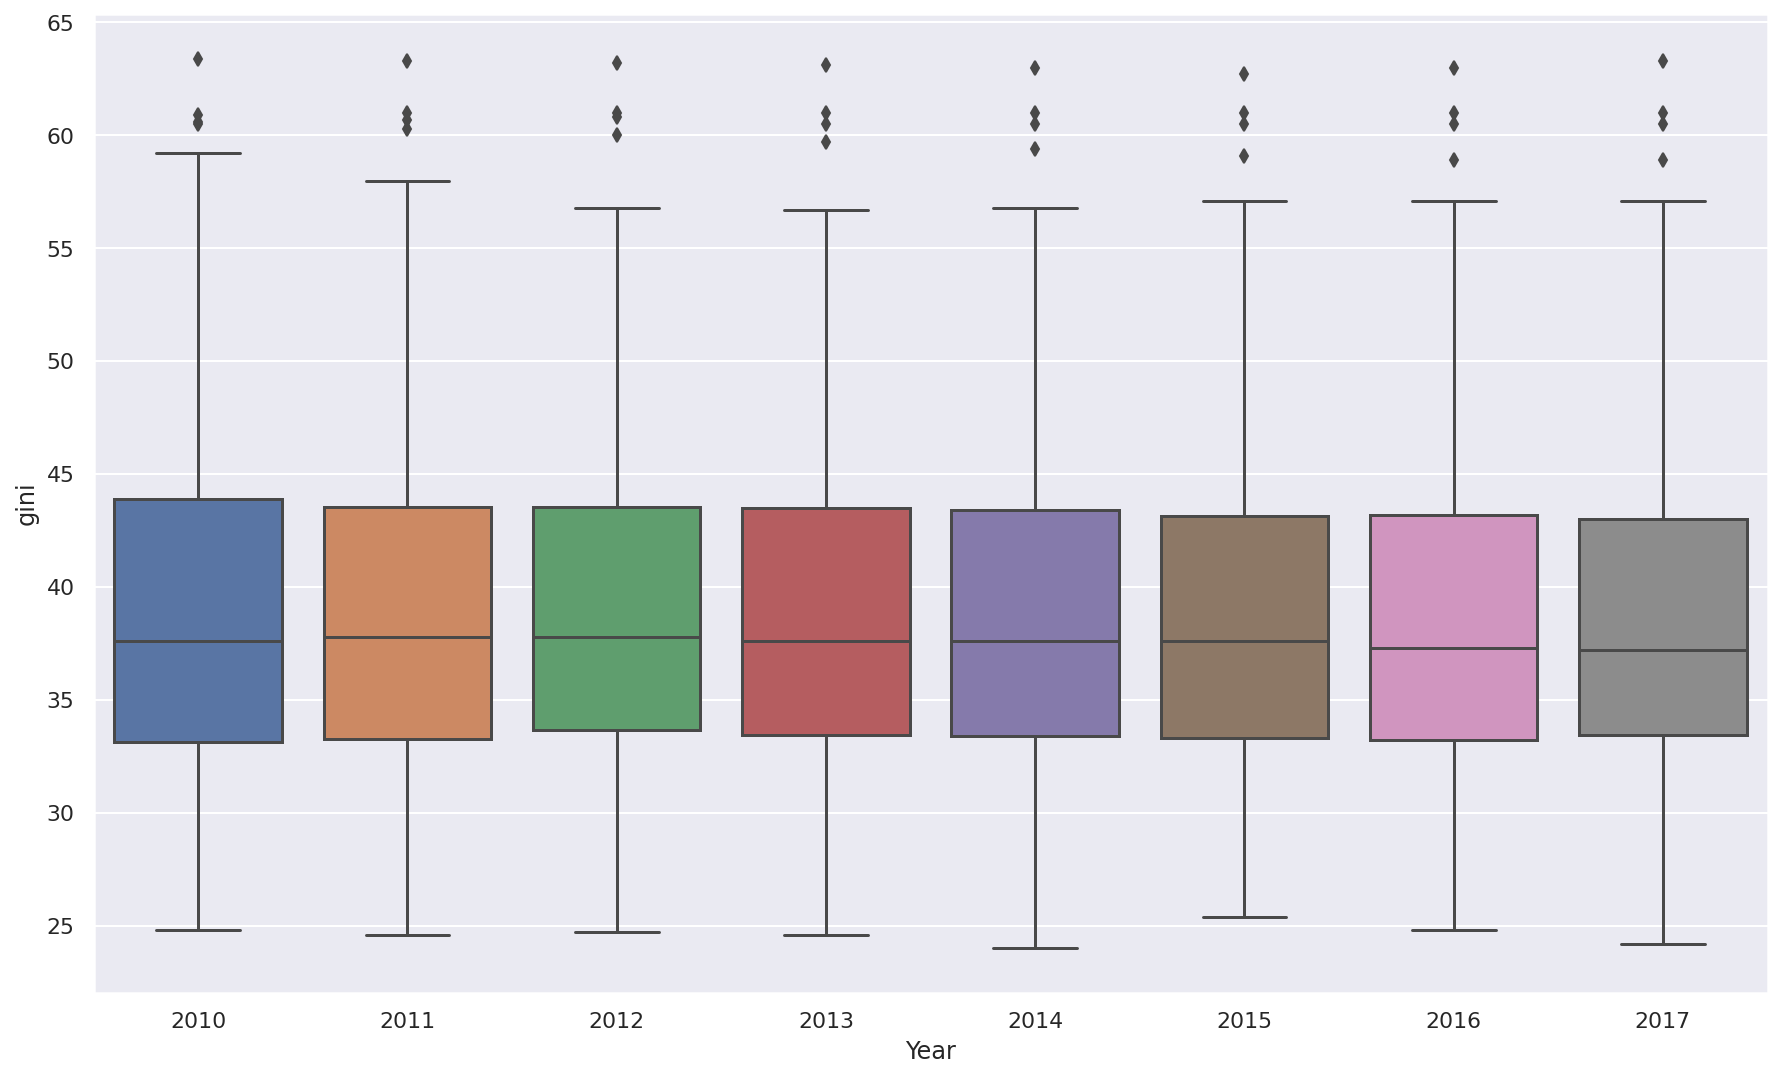

In [ ]:
sns.boxplot(x='Year', y='gini', data=df)


How freedom index changed over years

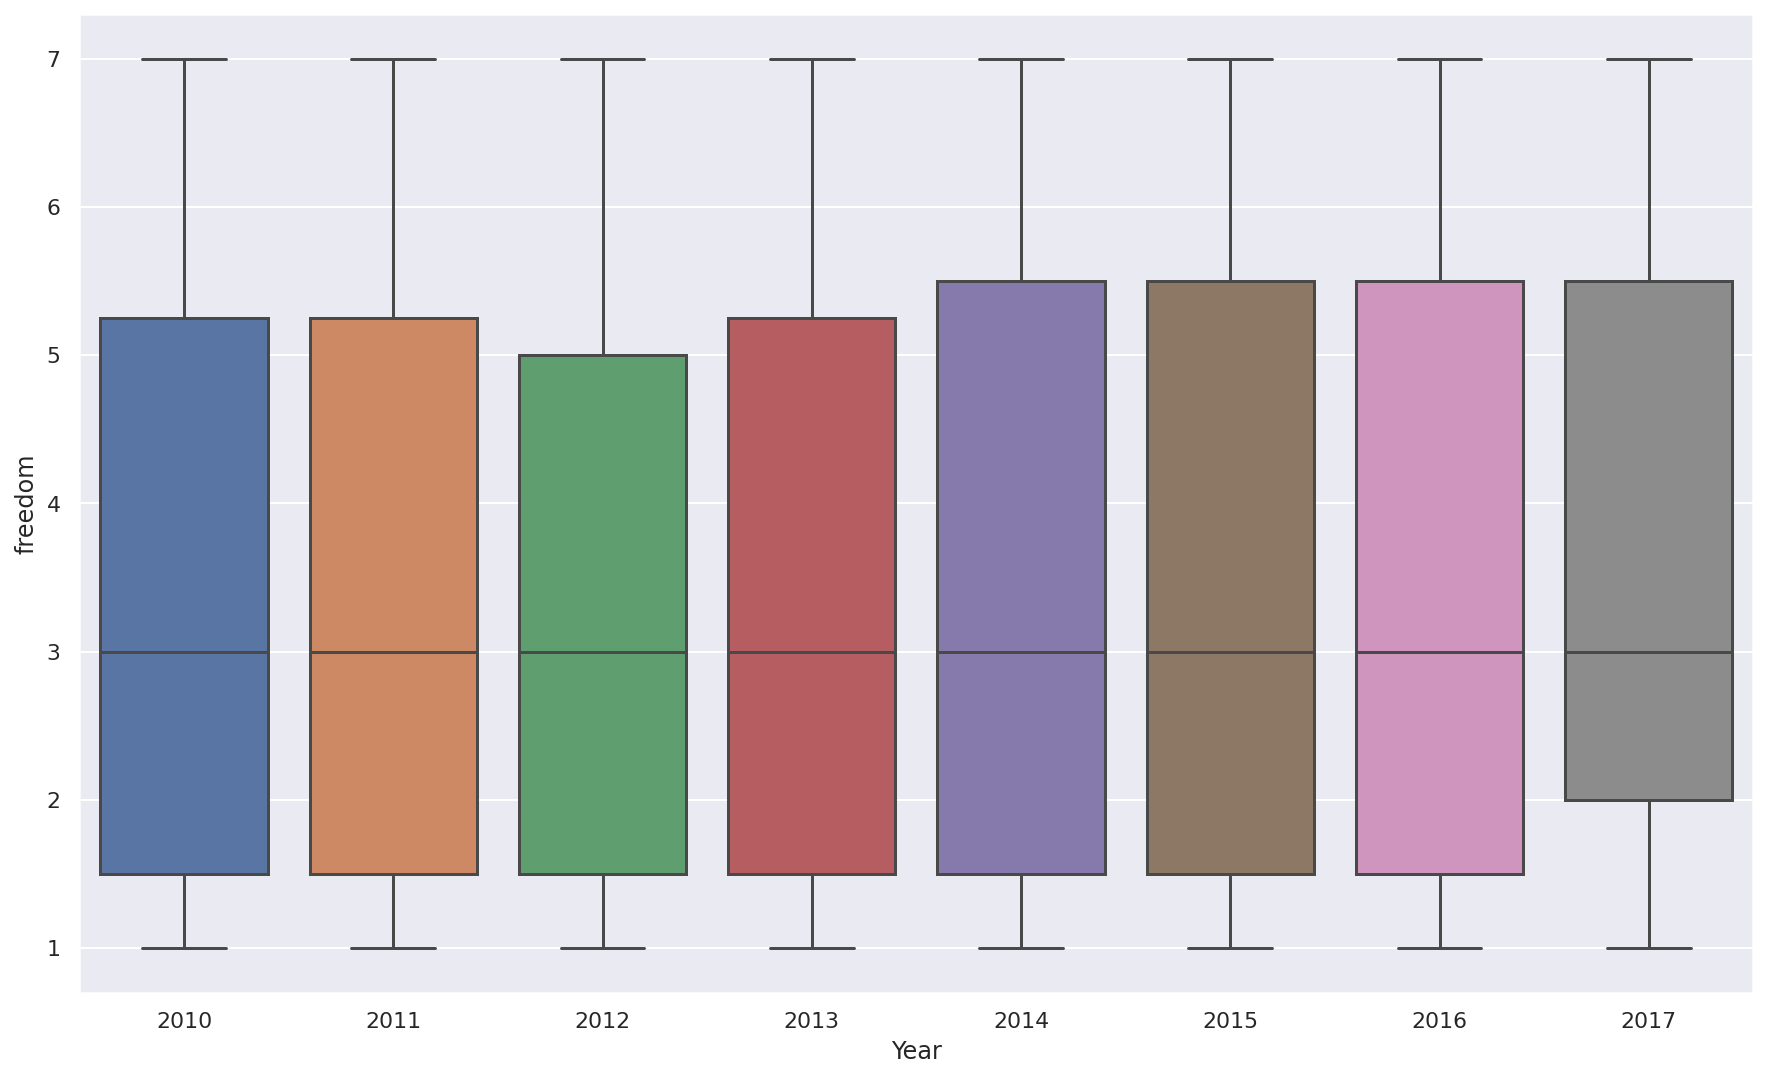

In [ ]:
sns.boxplot(x='Year', y='freedom', data=df)

How income changed

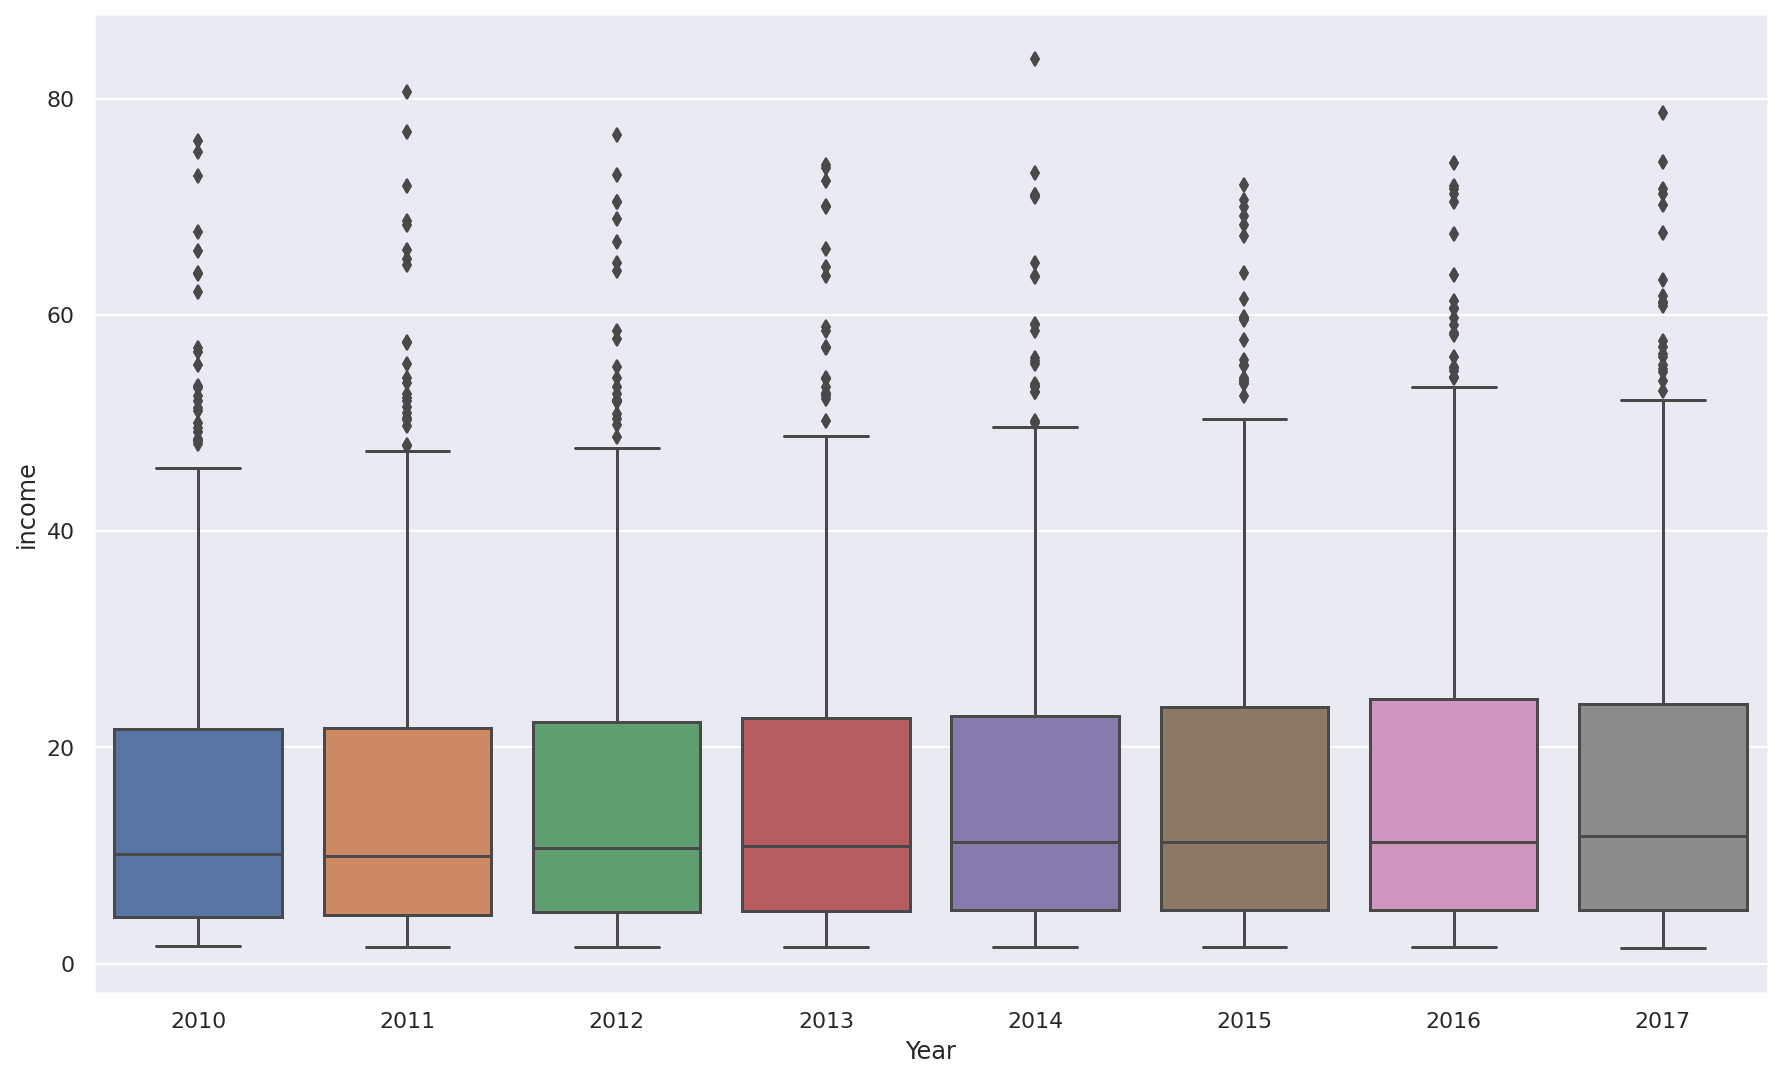

In [ ]:
sns.boxplot(x='Year', y='income', data=df)

How life expectancy changed

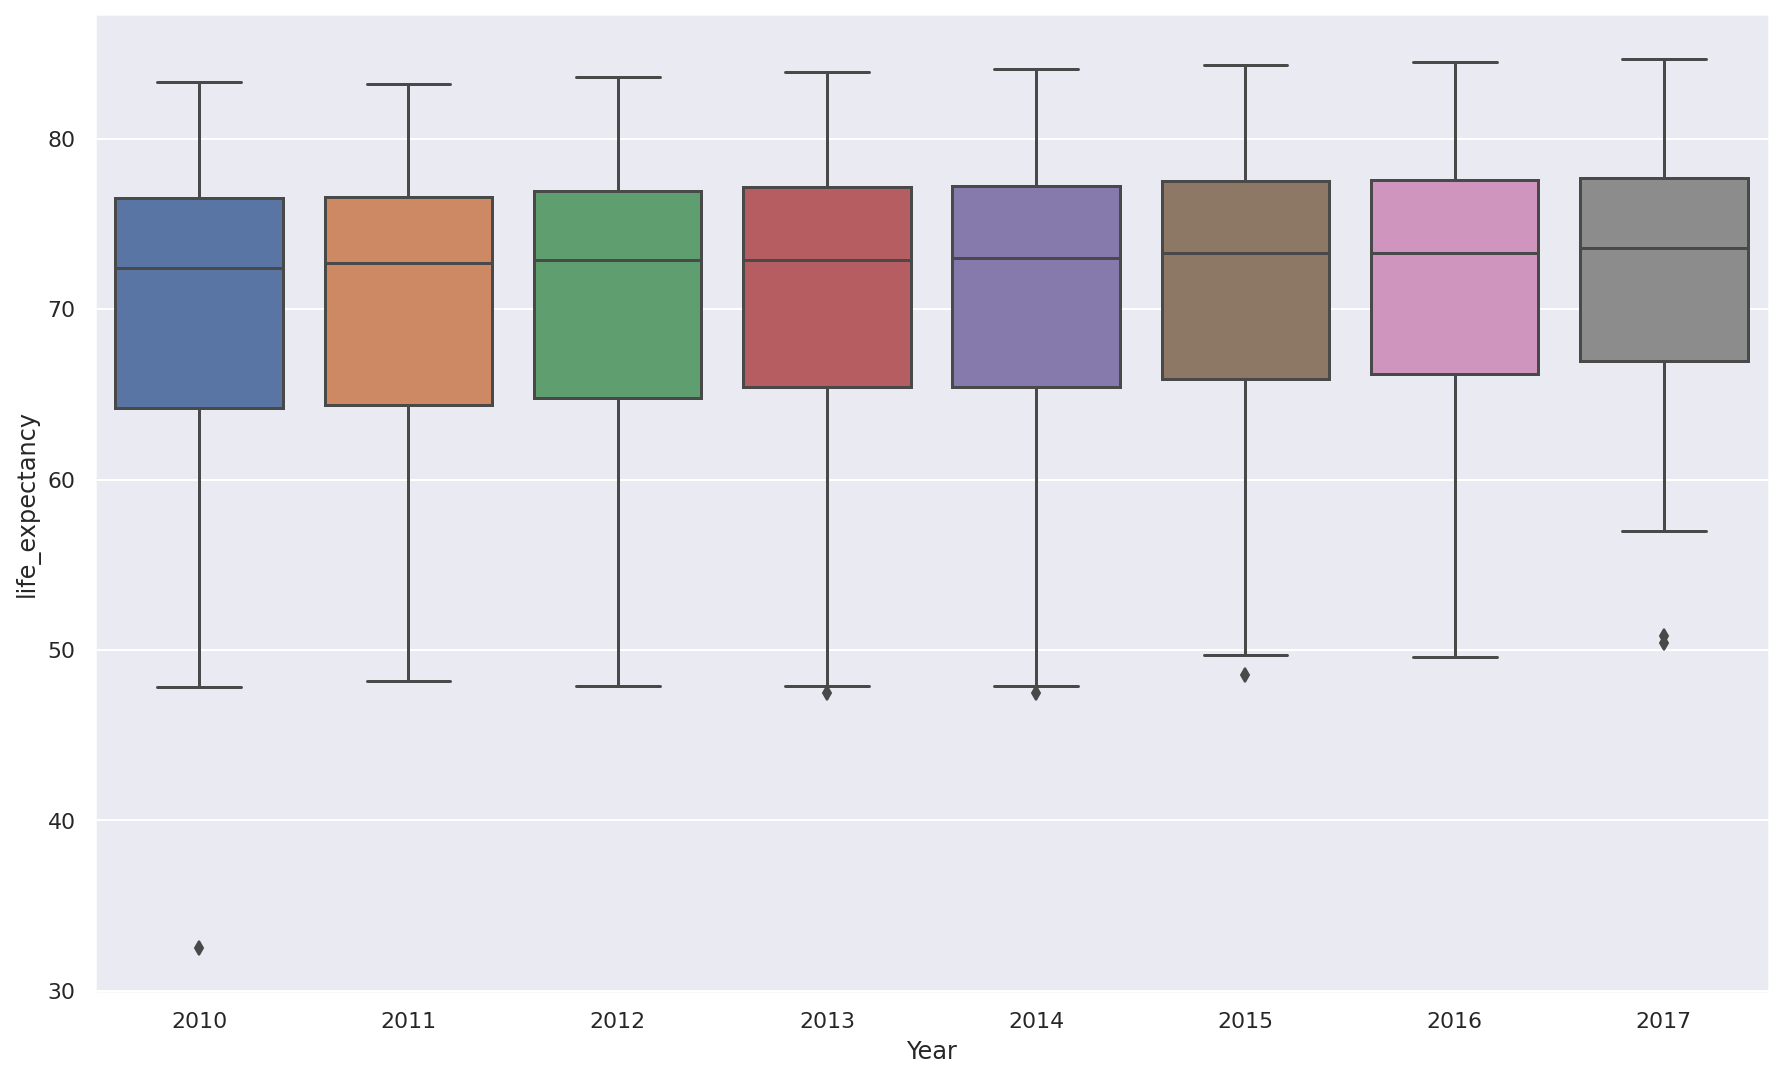

In [ ]:
sns.boxplot(x='Year', y='life_expectancy', data=df)

In [ ]:
plt.figure(figsize=(40,60),dpi=300)
sns.barplot(y='Death rate',x='gini',data= df)
plt.title('Death rate based on gini')
plt.xlabel('Gini coefficient')
plt.show()

**Test normality of our risk factors**

Test normality with D'Agostino's K-squared test 

D’Agostino’s K-squared test = This tests whether a sample differs from a normal distribution.

H0= The sample comes from a normal distribution.

HA=The sample is not coming from normal distribution.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1399 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            1399 non-null   object 
 1   Year              1399 non-null   int64  
 2   Total mortality   1399 non-null   float64
 3   income            1399 non-null   float64
 4   freedom           1399 non-null   float64
 5   gini              1399 non-null   float64
 6   life_expectancy   1399 non-null   float64
 7   Total population  1399 non-null   float64
 8   Death rate        1399 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 109.3+ KB


In [ ]:
#create a back up
df_total_back_up= df

df


Entity  Year  Total mortality  income  freedom  gini  \
0     Afghanistan  2010    277459.033637    2.67      6.0  37.7   
1     Afghanistan  2011    278332.429548    2.60      6.0  37.7   
2     Afghanistan  2012    275572.712941    2.83      6.0  37.7   
3     Afghanistan  2013    274537.870198    2.89      6.0  37.7   
4     Afghanistan  2014    275019.634482    2.87      6.0  37.7   
...           ...   ...              ...     ...      ...   ...   
1395     Zimbabwe  2013    136706.523399    5.05      5.5  43.5   
1396     Zimbabwe  2014    128099.799089    4.78      5.5  43.7   
1397     Zimbabwe  2015    123003.374582    4.48      5.0  43.9   
1398     Zimbabwe  2016    119720.025528    4.15      5.0  44.1   
1399     Zimbabwe  2017    117641.241285    3.97      5.5  44.3   

      life_expectancy  Total population   Death rate  
0                60.5        29185511.0   950.673893  
1                61.0        30117411.0   924.157888  
2                61.4        31161378.0   884.340586  
3                61.9        32269592.0   850.763376  
4                61.9        33370804.0   824.132480  
...               ...               ...          ...  
1395             57.2        13350378.0  1023.989908  
1396             58.0        13586710.0   942.831628  
1397             58.6        13814642.0   890.384091  
1398             59.2        14030338.0   853.293951  
1399             59.9        14236599.0   826.329668  

[1399 rows x 9 columns]

In [ ]:
df=df_total_back_up

df

Entity  Year  Total mortality  income freedom  gini  \
0     Afghanistan  2010    277459.033637    2.67     6.0  37.7   
1     Afghanistan  2011    278332.429548    2.60     6.0  37.7   
2     Afghanistan  2012    275572.712941    2.83     6.0  37.7   
3     Afghanistan  2013    274537.870198    2.89     6.0  37.7   
4     Afghanistan  2014    275019.634482    2.87     6.0  37.7   
...           ...   ...              ...     ...     ...   ...   
1395     Zimbabwe  2013    136706.523399    5.05     5.5  43.5   
1396     Zimbabwe  2014    128099.799089    4.78     5.5  43.7   
1397     Zimbabwe  2015    123003.374582    4.48     5.0  43.9   
1398     Zimbabwe  2016    119720.025528    4.15     5.0  44.1   
1399     Zimbabwe  2017    117641.241285    3.97     5.5  44.3   

      life_expectancy  Total population   Death rate  
0                60.5        29185511.0   950.673893  
1                61.0        30117411.0   924.157888  
2                61.4        31161378.0   884.340586  
3                61.9        32269592.0   850.763376  
4                61.9        33370804.0   824.132480  
...               ...               ...          ...  
1395             57.2        13350378.0  1023.989908  
1396             58.0        13586710.0   942.831628  
1397             58.6        13814642.0   890.384091  
1398             59.2        14030338.0   853.293951  
1399             59.9        14236599.0   826.329668  

[1399 rows x 9 columns]

Plot all the countries

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Year 2017')

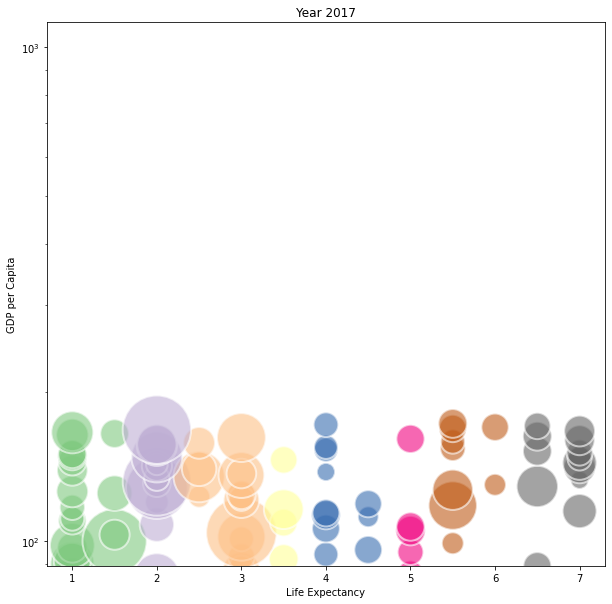

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Subset of the data for year 1952
data2017 = df.loc[df['Year'] == 2017]

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data2017['freedom']=pd.Categorical(data2017['freedom'])

# Scatterplot
plt.scatter(
    x = data2017['freedom'], 
    y = data2017['Entity'], 
    s=data2017['Death rate'], 
    c=data2017['freedom'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("Year 2017")
#plt.ylim(0,50000)
#plt.xlim(30, 75);


Text(0.5, 1.0, '')

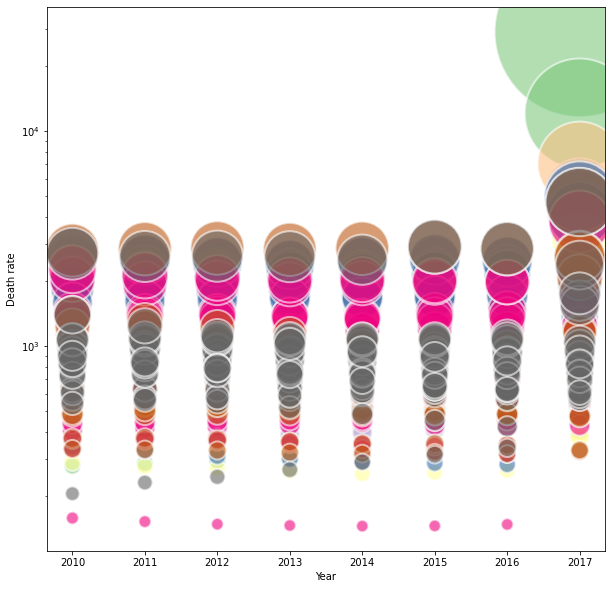

In [ ]:
# import matplotlib
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 10))

# Subset of the data for year 1952
#data2017 = df.loc[df['Year'] == 2017]
data2017=df
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
#data2017['freedom']=pd.Categorical(data2017['freedom'])
data2017['Entity']=pd.Categorical(data2017['Entity'])

# Scatterplot
plt.scatter(
    x = data2017['Year'], 
    y = data2017['Death rate'], 
    s=data2017['Death rate'], 
    c=data2017['Entity'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Year")
plt.ylabel("Death rate")
plt.title("")
#plt.ylim(0,50000)
#plt.xlim(30, 75);

We need to select just one year. We will select 2017. We will filter the dataframe based on that year.

In [ ]:
#filter the dataframe for 2017
df=df.loc[df['Year'] == 2017]

df

Entity  Year  Total mortality  income freedom  gini  \
7     Afghanistan  2017    255149.692264    2.81     5.5  37.7   
15        Albania  2017     43518.126217    8.73     3.0  33.2   
23        Algeria  2017    209331.577187    9.23     5.5  27.3   
31        Andorra  2017      3778.825087   61.70     1.0  35.2   
39         Angola  2017    176139.329614    3.37     6.0  50.3   
...           ...   ...              ...     ...     ...   ...   
1367    Venezuela  2017    223110.356227    8.28     5.5  43.7   
1375      Vietnam  2017    704691.582408   10.40     6.0  35.5   
1383        Yemen  2017    189317.913434    2.40     6.5  36.7   
1391       Zambia  2017    102433.538526    2.94     4.0  57.1   
1399     Zimbabwe  2017    117641.241285    3.97     5.5  44.3   

      life_expectancy  Total population   Death rate  
7                62.9        36296111.0   702.967027  
15               78.3         2873457.0  1514.486774  
23               75.9        41389174.0   505.764085  
31               82.1           76997.0  4907.756259  
39               64.2        29816769.0   590.739156  
...               ...               ...          ...  
1367             75.5        29851249.0   747.407106  
1375             74.2        94600643.0   744.912043  
1383             67.3        27168210.0   696.836168  
1391             61.9        16853608.0   607.784034  
1399             59.9        14236599.0   826.329668  

[174 rows x 9 columns]

In [ ]:
from scipy import stats

df_normal = df[['income', 'freedom','gini','life_expectancy','Death rate']]


df_normal = df_normal.astype(float)

k2, p = stats.normaltest(df_normal)

alpha = 0.05


In [ ]:
import scipy.stats

columns=df_normal.columns


for i in columns: 
   print([i])
   a,b=stats.normaltest(df_normal[i])
   print(a,b)
   if b < alpha: 
     print("The null hypothesis can be rejected")
   else:
     print("The null hypothetis cannot be rejected") 

['income']
38.71113261192667 3.9263079483925205e-09
The null hypothesis can be rejected
['freedom']
95.64958199587369 1.698076185958239e-21
The null hypothesis can be rejected
['gini']
20.94878994582945 2.8250625107579054e-05
The null hypothesis can be rejected
['life_expectancy']
7.529130264062793 0.023177689278708072
The null hypothesis can be rejected
['Death rate']
298.64135382936763 1.4153178430422818e-65
The null hypothesis can be rejected


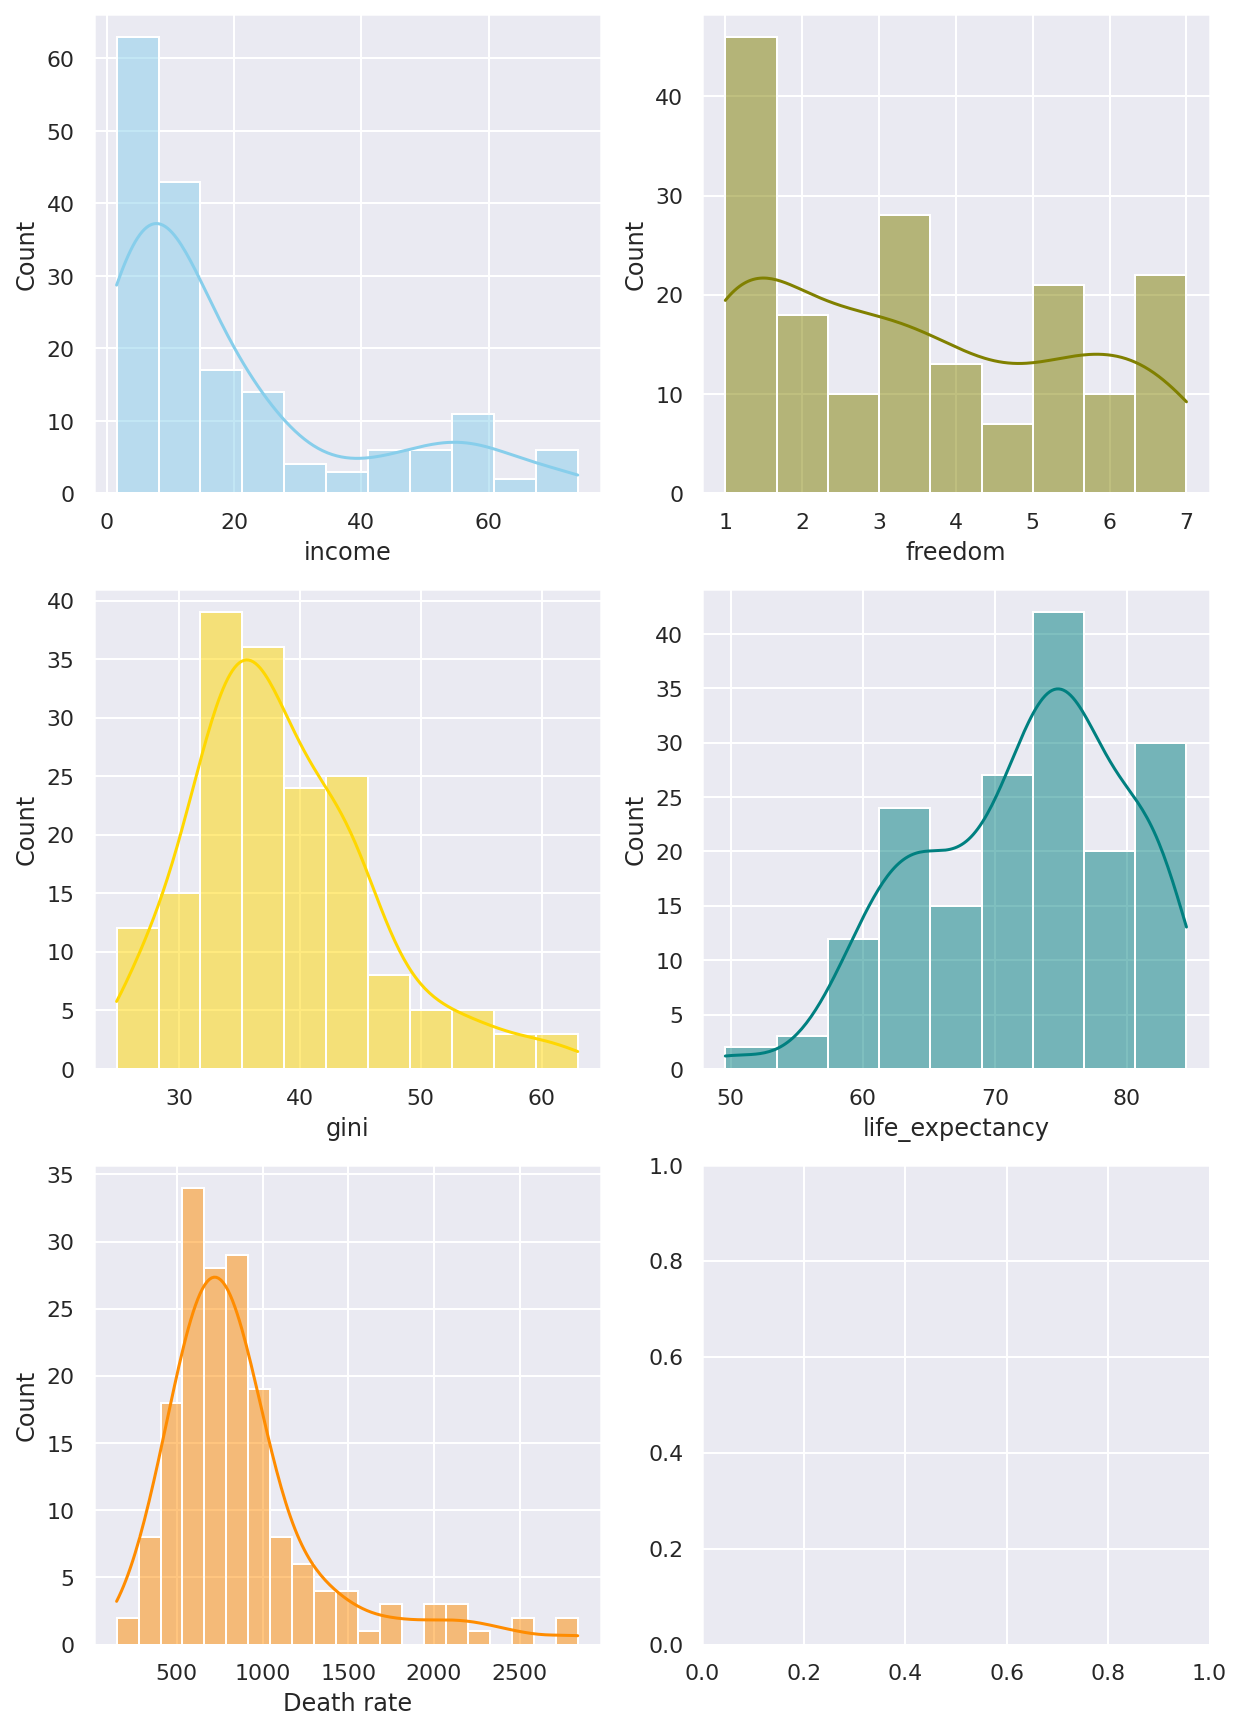

In [ ]:
#Do an histogram for each of the variables 
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

sns.histplot(data=df_normal, x="income", kde=True, color="skyblue",label="income", ax=axs[0, 0])
sns.histplot(data=df_normal, x="freedom", kde=True, color="olive",label="freedom", ax=axs[0, 1])
sns.histplot(data=df_normal, x="gini", kde=True, color="gold",label="gini", ax=axs[1, 0])
sns.histplot(data=df_normal, x="life_expectancy", kde=True, color="teal",label="life expectancy", ax=axs[1, 1])
sns.histplot(data=df_normal, x="Death rate", kde=True, color="darkorange",label="Death rate", ax=axs[2, 0])


plt.show()

In [ ]:
#CORRELOGRAM 
import seaborn as sns
from sklearn import linear_model
 
list(df_normal)

['income', 'freedom', 'gini', 'life_expectancy', 'Death rate']

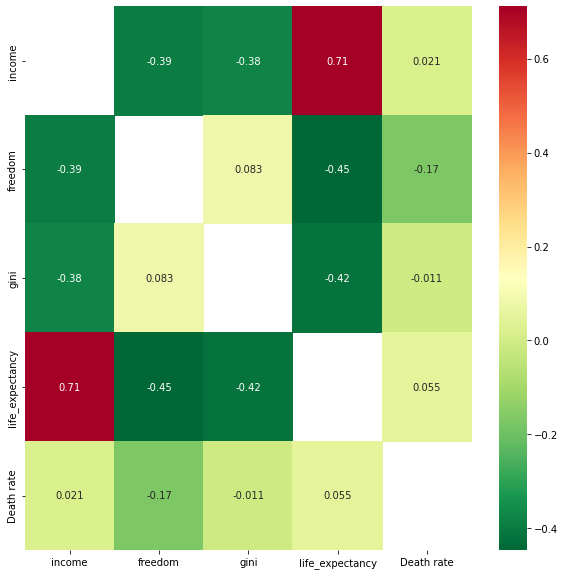

In [ ]:
df_normal.columns = ['income', 'freedom','gini','life_expectancy','Death rate']

import numpy as np # Data manipulation  
import matplotlib.pyplot as plt 
import seaborn 
c = df_normal.corr() 
plt.figure(figsize=(10,10)) 
seaborn.heatmap(c, cmap='RdYlGn_r',annot=True,label='spearman Correlation Heat Map', mask = (np.abs(c) >= 1)) 
plt.show()

**Modelling**

Assumption of Regression Model : 

*   Linearity: The relationship between dependent and independent variables should be linear.
*   Homoscedasticity: Constant variance of the errors should be maintained.
*   Multivariate normality: Multiple Regression assumes that the residuals are normally distributed.
*   Lack of Multicollinearity: It is assumed that there is little or no multicollinearity in the data.

**Hypothesis**

H0: Death rate is not affected by the country’s average daily household per capita income, life expectancy, gini coefficient and  freedom index
H1: Death rate is affected by the country’s average daily household per capita income, life expectancy, gini coefficient and  freedom index

Let's follow the tutorial: https://timeseriesreasoning.com/contents/assumptions-of-linear-regression/ (plots) + https://datatofish.com/multiple-linear-regression-python/ (model build) + https://medium.com/machine-learning-with-python/multiple-linear-regression-implementation-in-python-2de9b303fc0c (train & test)

In [ ]:
import pandas as pd
from patsy import dmatrices
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

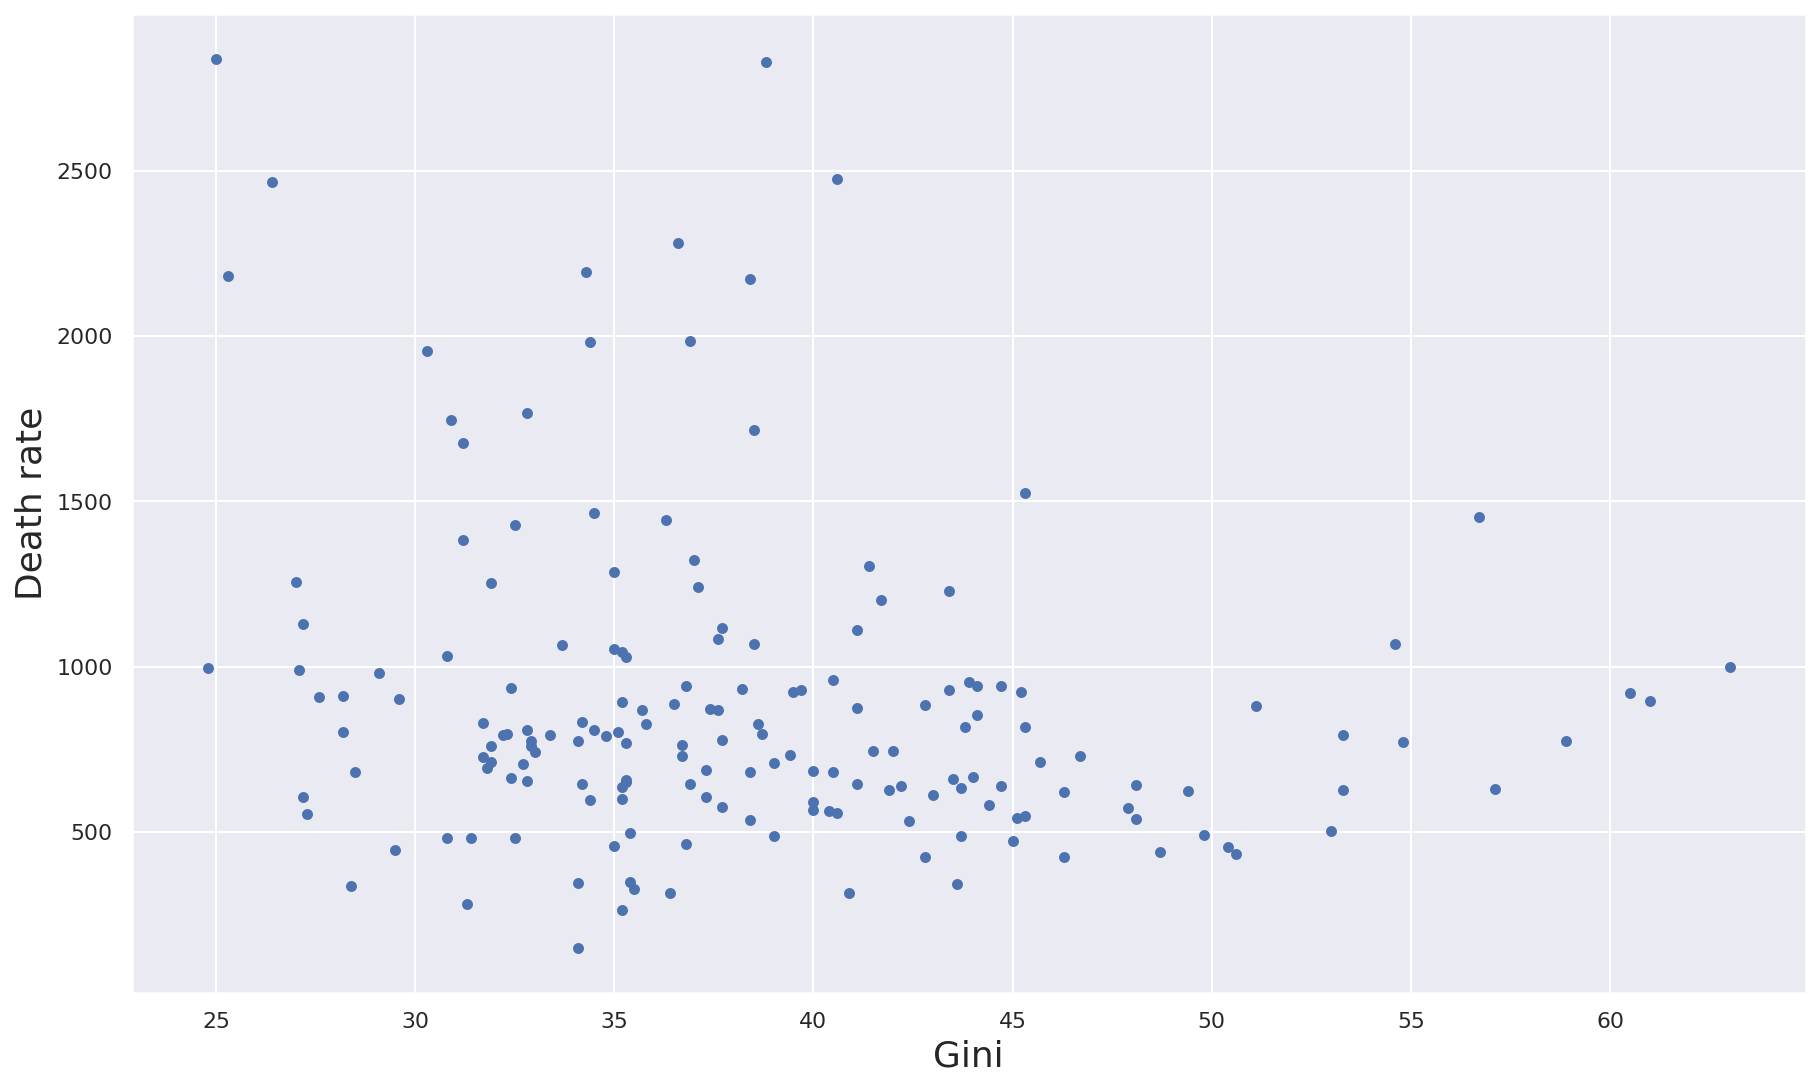

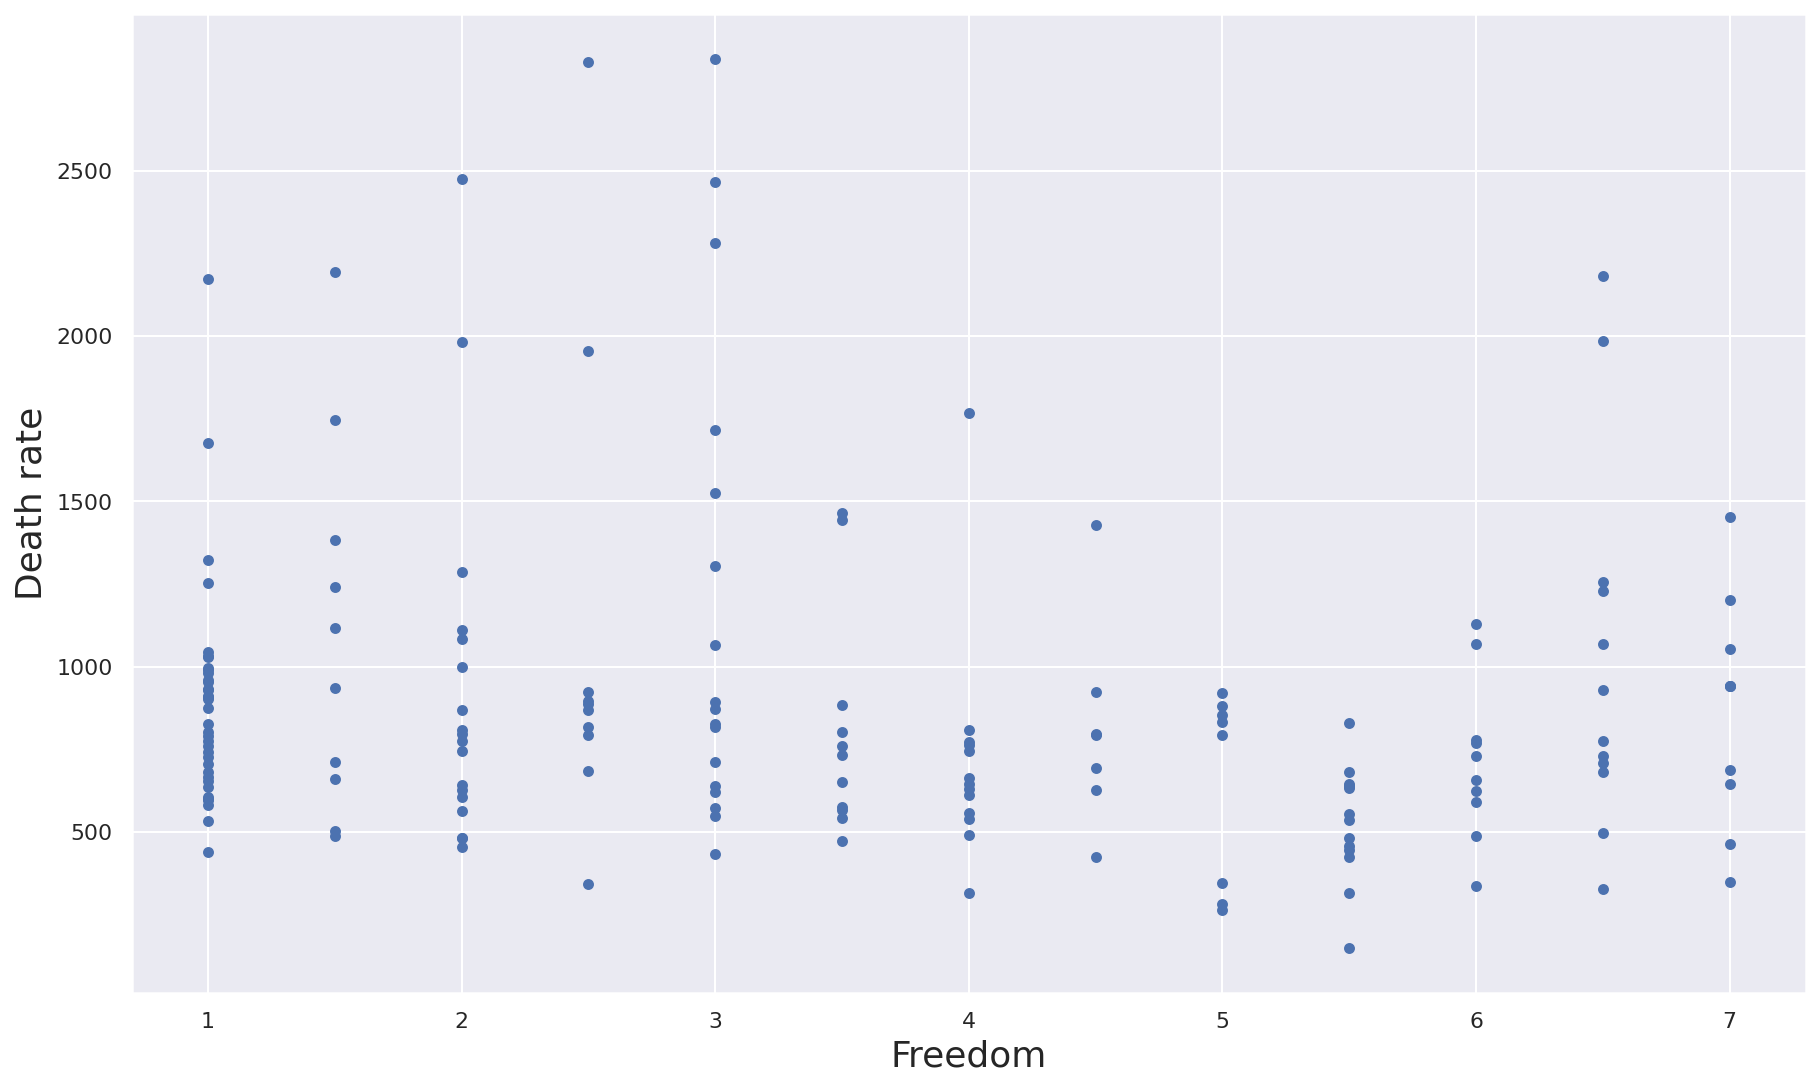

In [ ]:
#Test linearity 
df.plot.scatter(x='income', y='Death rate')
plt.xlabel('Daily average household per capita income', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()
 
df.plot.scatter(x='gini', y='Death rate')
plt.xlabel('Gini', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()
 
df.plot.scatter(x='life_expectancy', y='Death rate')
plt.xlabel('Life expectancy', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()
 
df.plot.scatter(x='freedom', y='Death rate')
plt.xlabel('Freedom', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()

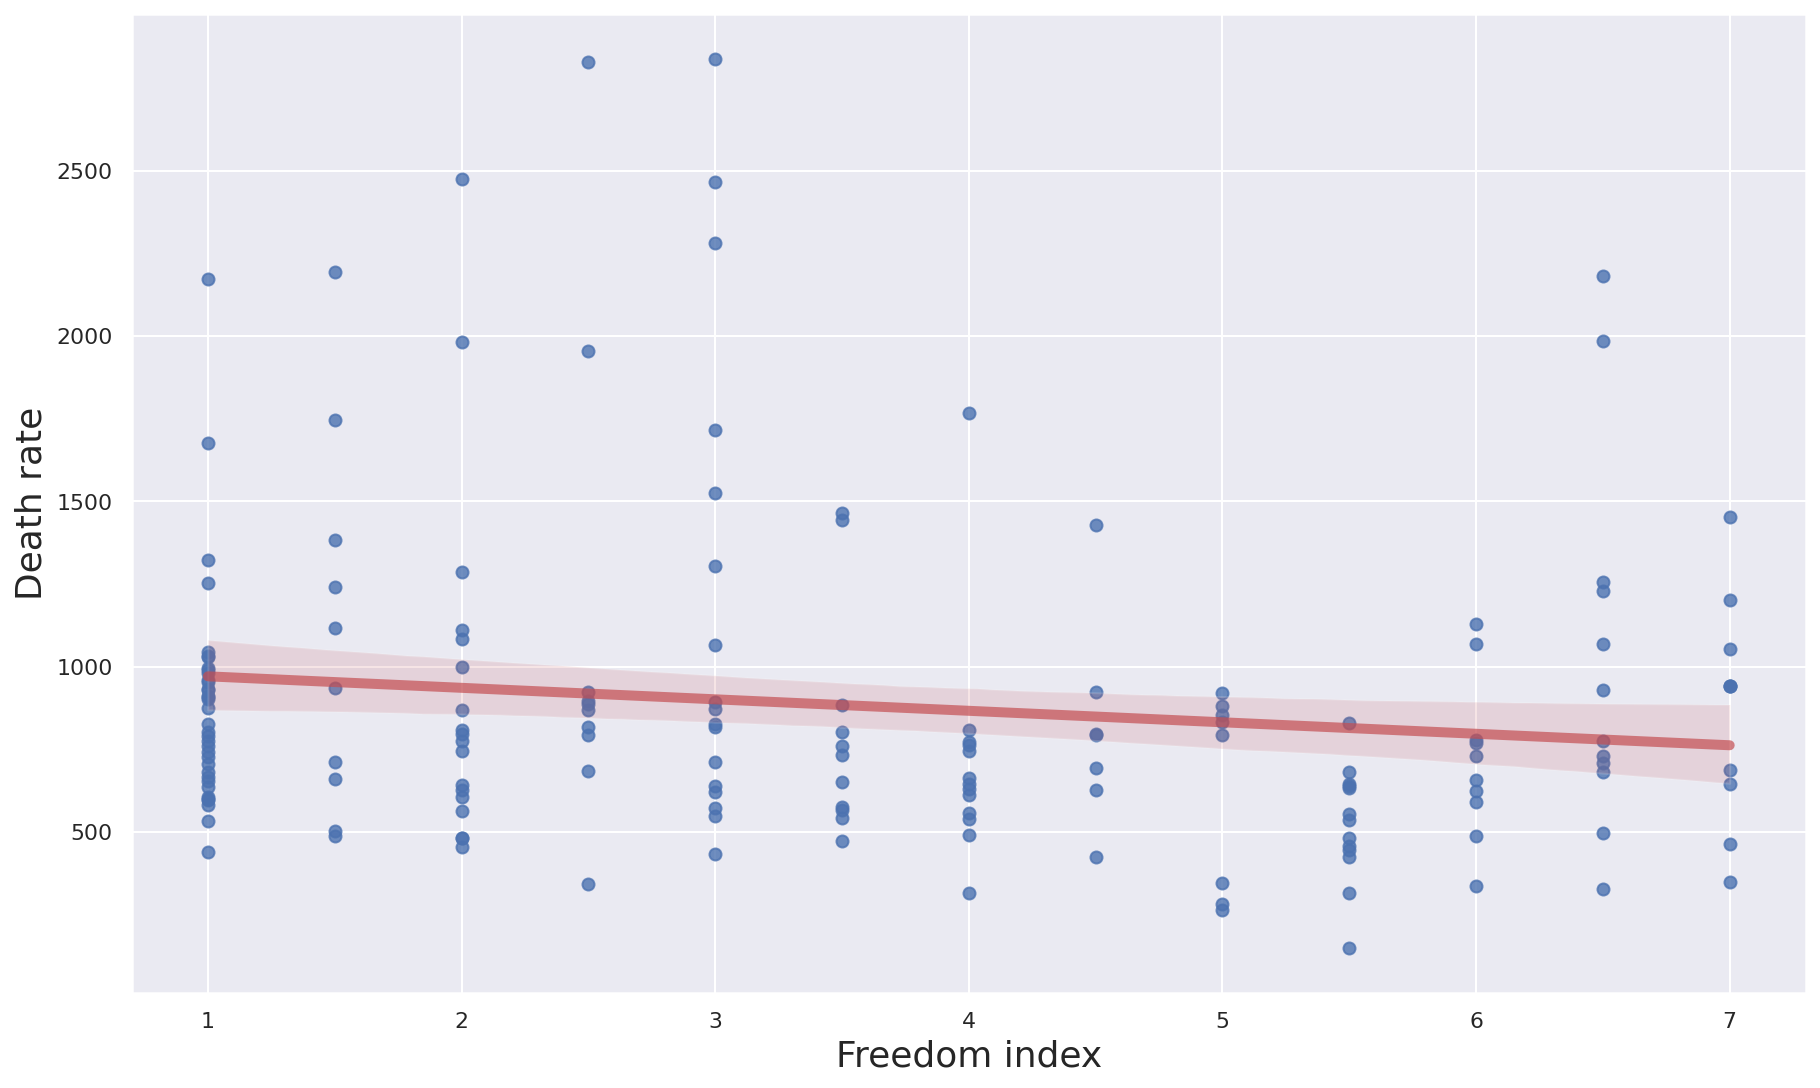

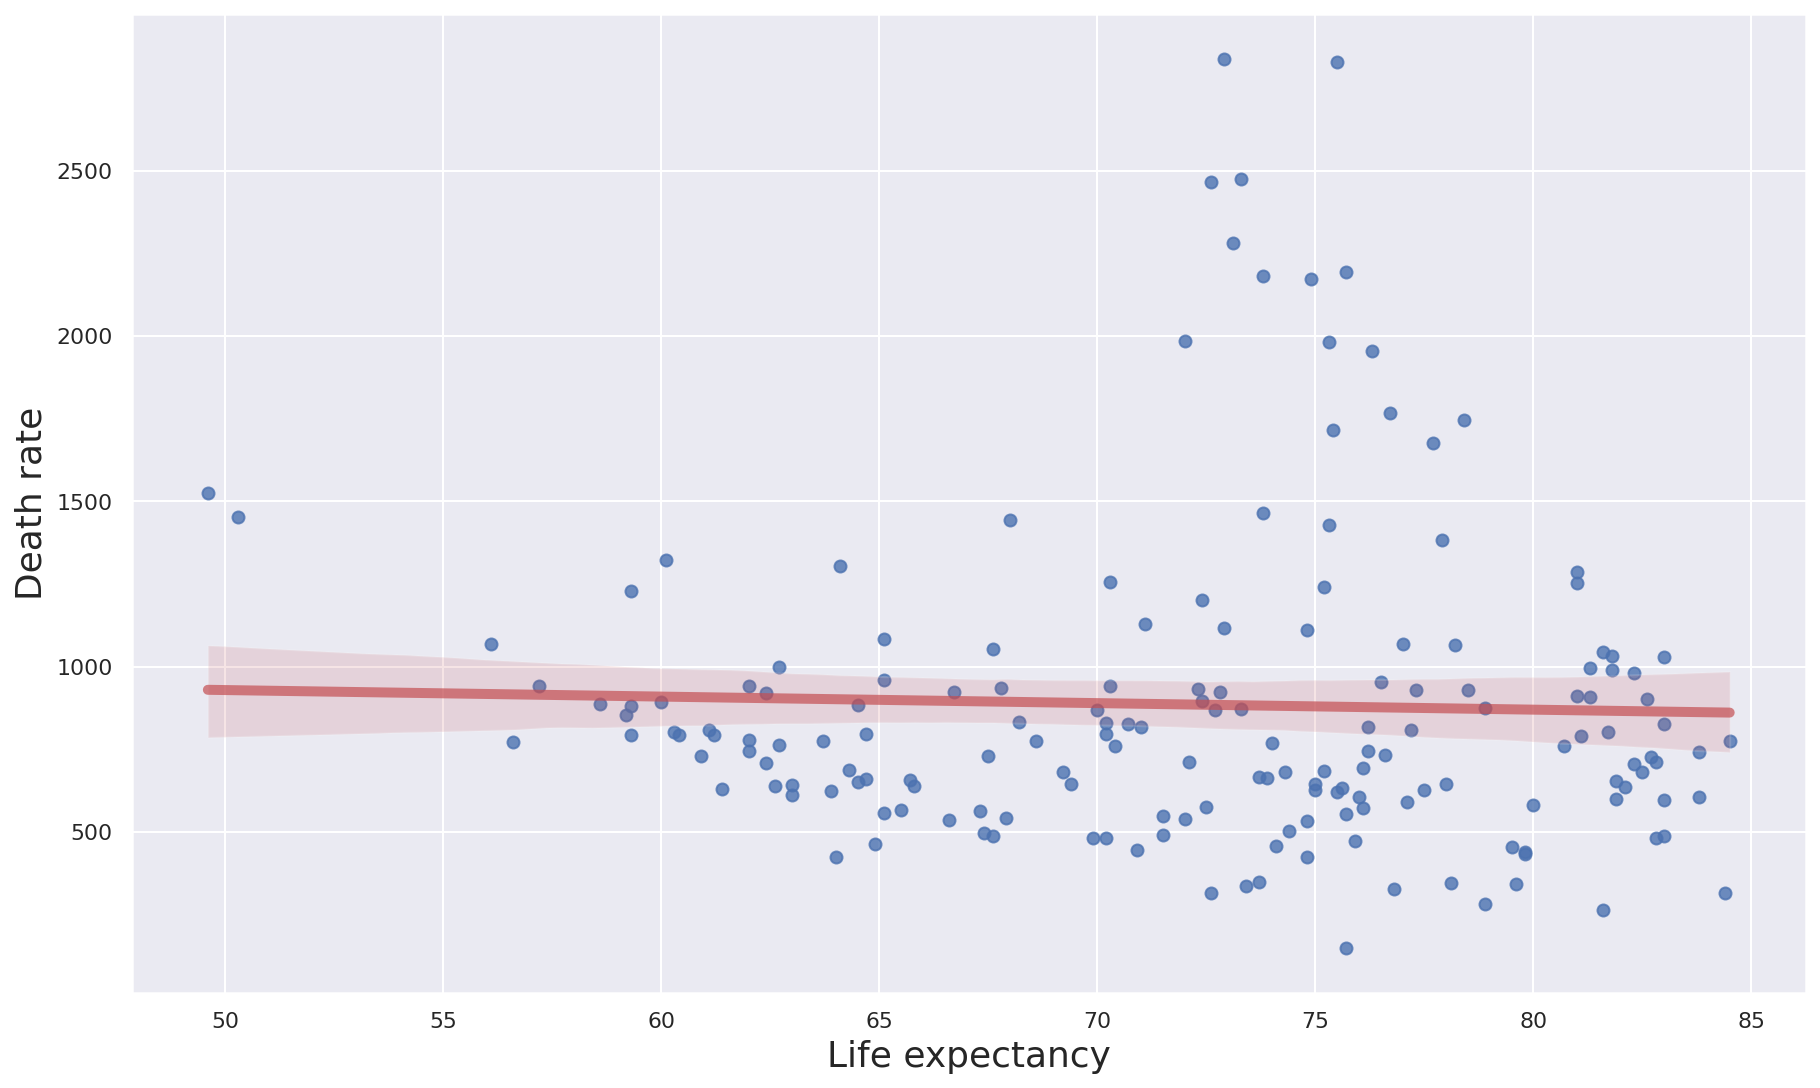

In [ ]:
sns.regplot(x=df["income"], y=df["Death rate"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Daily average household per capita income', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()

sns.regplot(x=df["gini"], y=df["Death rate"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Gini', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()

sns.regplot(x=df["freedom"], y=df["Death rate"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Freedom index', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()

sns.regplot(x=df["life_expectancy"], y=df["Death rate"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Life expectancy', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()


In [ ]:
df_normal.corr()['Death rate']

income             0.020879
freedom           -0.172544
gini              -0.011461
life_expectancy    0.055366
Death rate         1.000000
Name: Death rate, dtype: float64

In [ ]:
x = df[['income','gini', 'freedom','life_expectancy']]
y = df['Death rate']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 2419.164271656532
Coefficients: 
 [  -9.07031132   -5.55199209 -243.25533358    4.14482035]
                            OLS Regression Results                            
Dep. Variable:             Death rate   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.431
Date:                Wed, 19 Oct 2022   Prob (F-statistic):              0.226
Time:                        10:59:49   Log-Likelihood:                -1605.3
No. Observations:                 174   AIC:                             3221.
Df Residuals:                     169   BIC:                             3236.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


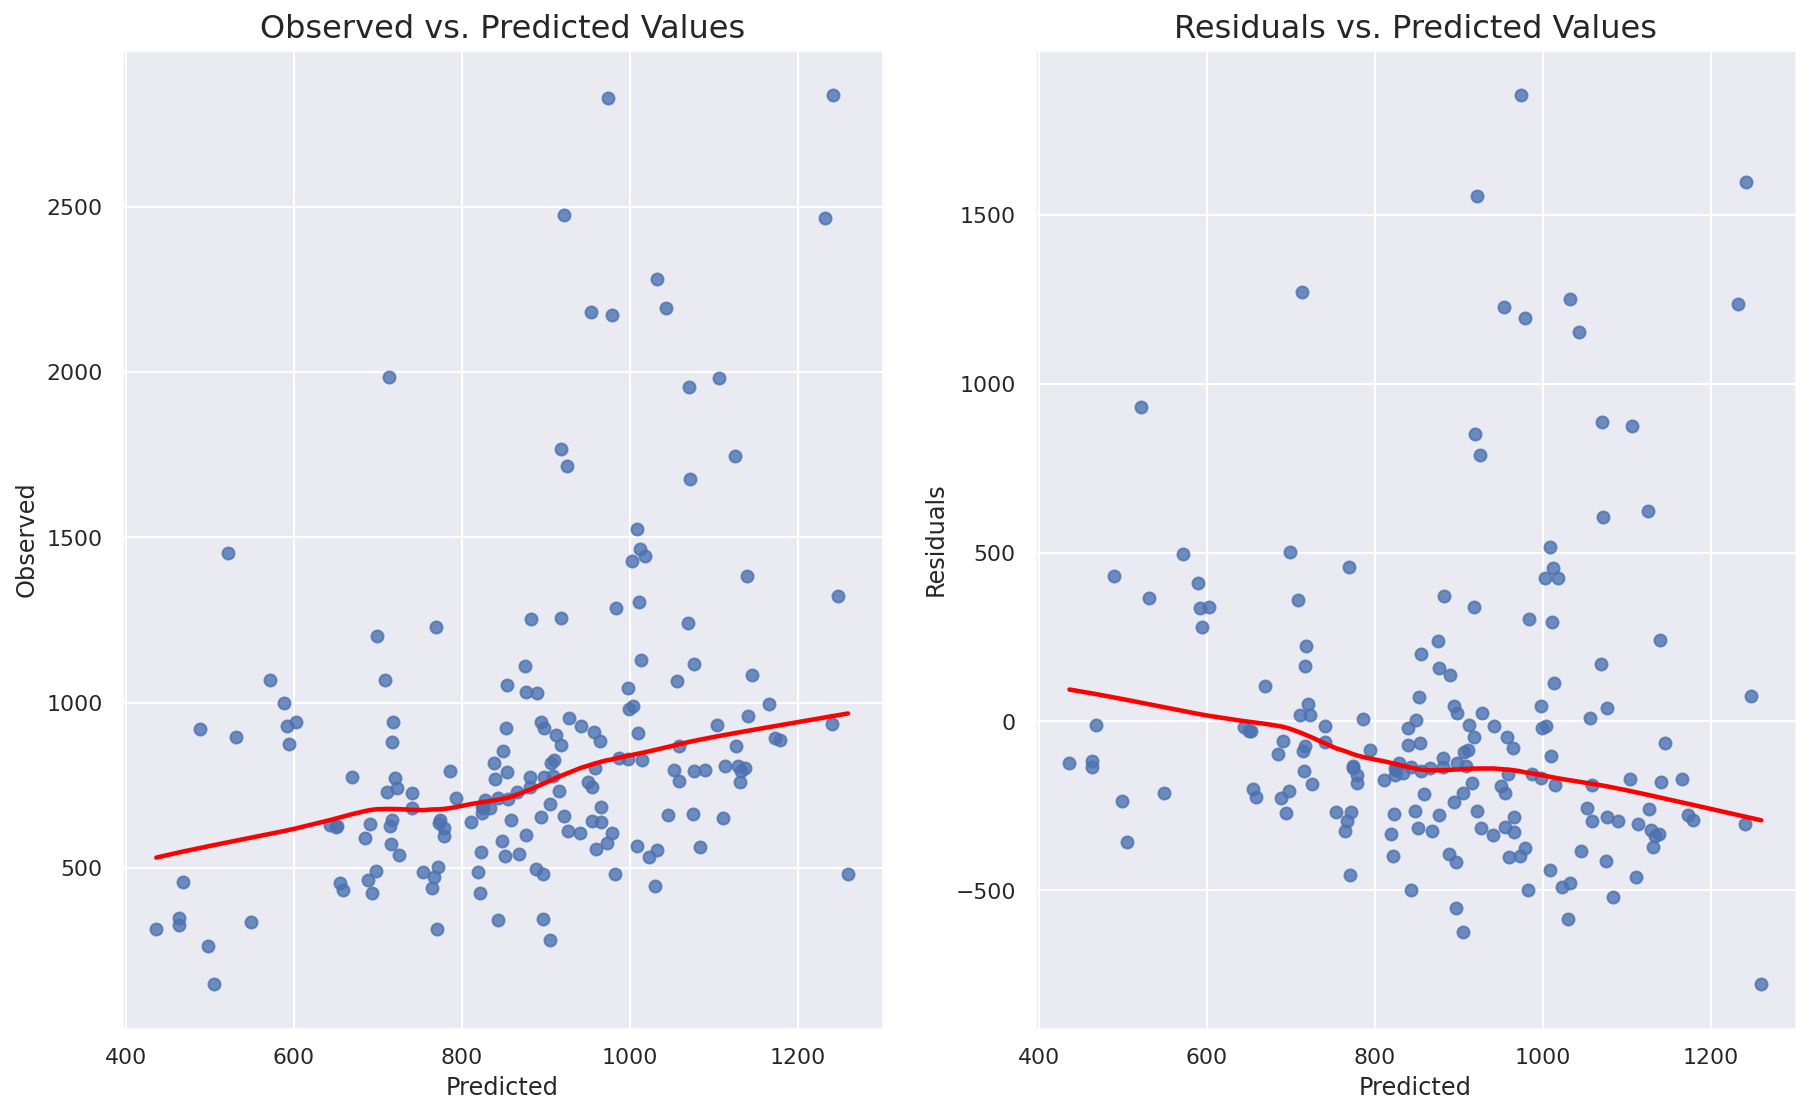

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model, y)  

In [ ]:
model.resid.mean()

-3.533439186198273e-12


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  8.918557
p-value                        0.063168
f-value                        2.282246
f p-value                      0.062509

 Goldfeld-Quandt test ----
                value
F statistic  1.148213
p-value      0.265645

 Residuals plots ----


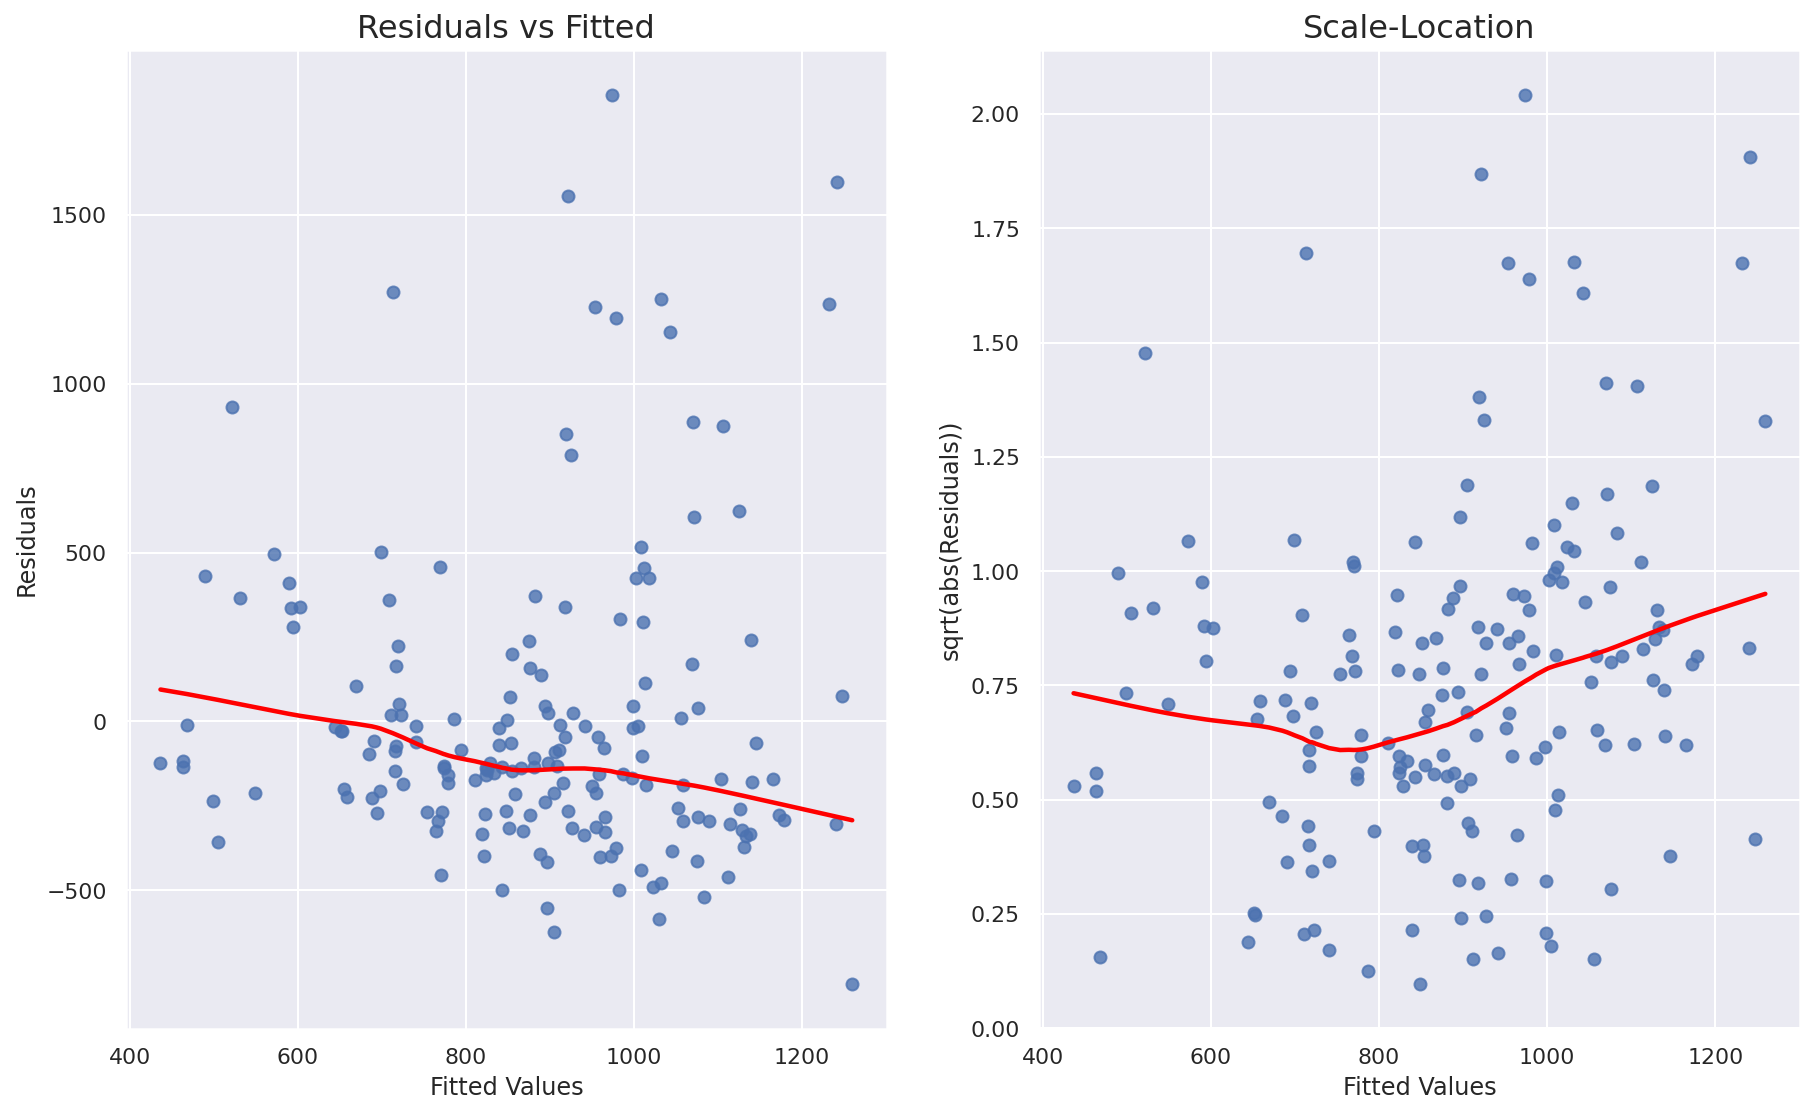

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model)

Check in the outlier was the cause of freedom being significantly correlated in a negative way 

In [ ]:
df_cap=df.loc[df['Death rate'] < 1500]

df_cap

Entity  Year  Total mortality  income freedom  gini  \
7     Afghanistan  2017    255149.692264    2.81     5.5  37.7   
23        Algeria  2017    209331.577187    9.23     5.5  27.3   
39         Angola  2017    176139.329614    3.37     6.0  50.3   
55      Argentina  2017    302419.025040   21.20     2.0  41.1   
71      Australia  2017    144360.358083   60.80     1.0  34.4   
...           ...   ...              ...     ...     ...   ...   
1367    Venezuela  2017    223110.356227    8.28     5.5  43.7   
1375      Vietnam  2017    704691.582408   10.40     6.0  35.5   
1383        Yemen  2017    189317.913434    2.40     6.5  36.7   
1391       Zambia  2017    102433.538526    2.94     4.0  57.1   
1399     Zimbabwe  2017    117641.241285    3.97     5.5  44.3   

      life_expectancy  Total population  Death rate  
7                62.9        36296111.0  702.967027  
23               75.9        41389174.0  505.764085  
39               64.2        29816769.0  590.739156  
55               76.3        44044811.0  686.616694  
71               83.0        24601860.0  586.786357  
...               ...               ...         ...  
1367             75.5        29851249.0  747.407106  
1375             74.2        94600643.0  744.912043  
1383             67.3        27168210.0  696.836168  
1391             61.9        16853608.0  607.784034  
1399             59.9        14236599.0  826.329668  

[131 rows x 9 columns]

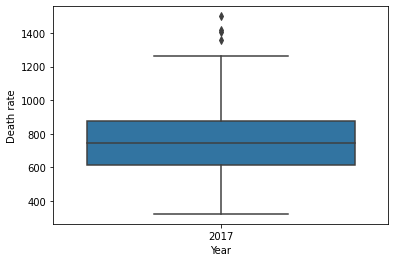

In [ ]:
sns.boxplot(x='Year', y='Death rate', data=df_cap)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


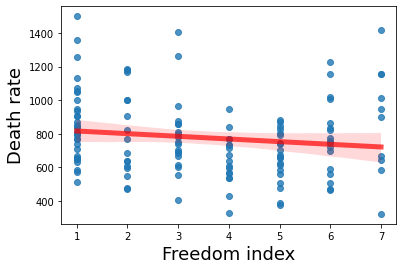

In [ ]:
df_cap['freedom']=df_cap['freedom'].astype(int)

sns.regplot(x=df_cap["freedom"], y=df_cap["Death rate"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Freedom index', fontsize=18)
plt.ylabel('Death rate', fontsize=18)
plt.show()


In [ ]:
x_cap = df_cap[['income','gini', 'freedom','life_expectancy']]
y_cap = df_cap['Death rate']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_cap = sm.add_constant(x_cap) # adding a constant
 
model_cap = sm.OLS(y_cap, x_cap).fit()
predictions = model_cap.predict(x_cap) 
 
print_model_cap = model_cap.summary()
print(print_model_cap)

Intercept: 
 2419.164271656532
Coefficients: 
 [  -9.07031132   -5.55199209 -243.25533358    4.14482035]
                            OLS Regression Results                            
Dep. Variable:             Death rate   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     4.913
Date:                Wed, 19 Oct 2022   Prob (F-statistic):            0.00103
Time:                        12:36:02   Log-Likelihood:                -889.25
No. Observations:                 131   AIC:                             1789.
Df Residuals:                     126   BIC:                             1803.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
